# Data Preparation

## Install necessary libraries & grab data files

### Step 1.

Begin by cloning the GitHub repository using the following commands. This repository contains the necessary code and example data. Then install the python packages using pip and import them into the python environment (either Google Colab or using a local python installation on your computer).

In [1]:
import os

# set this path to the git cloned PCNtoolkit-demo repository --> Uncomment whichever line you need for either running on your own computer or on Google Colab.
#wdir = '<path-to-your>/PCNtoolkit-demo' # if running on your own computer, use this line (change the path to match where you cloned the repository)
wdir ='C:/Users/11574/PCNtoolkit-demo' # if running on Google Colab, use this line

os.chdir(os.path.join(wdir,'tutorials','BLR_protocol'))

In [33]:
! pip install -r requirements.txt

  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


## Prepare covariate data

### Step 2.

The data set (downloaded in Step 1) includes a multi-site dataset from the [Human Connectome Project Young Adult study](https://www.humanconnectome.org/study/hcp-young-adult) and [IXI](https://brain-development.org/ixi-dataset/). It is also possible to use different datasets (i.e., your own data or additional public datasets) in this step. If using your own data here, it is recommended to load the example data to view the column names in order to match your data to this format. Read in the data files using pandas, then merge the covariate (age & sex) data from each site into a single data frame (named cov). The columns of this covariate data frame represent the predictor variables. Additional columns may be added here, depending on the research question.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joypy
from sklearn.model_selection import train_test_split
from pcntoolkit.normative import estimate, evaluate
from pcntoolkit.util.utils import create_bspline_basis, compute_MSLL

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
# if running in Google colab, remove the "data/" folder from the path
#hcp = pd.read_csv(os.path.join(wdir,'data','HCP1200_age_gender.csv'))
#ixi = pd.read_csv(os.path.join(wdir,'data','IXI_age_gender.csv'))
cov=pd.read_csv(os.path.join(wdir,'data','808_cov_processed.csv'))
#cov = cov.drop("participant_id", axis=1)  
cov

,participant_id,age,sex,site
0,28761,11.484932,1,1
1,28765,12.065753,1,1
2,28768,11.358904,1,1
3,28771,12.600000,1,1
4,28778,9.983562,1,1
...,...,...,...,...
803,51305,12.640000,2,12
804,51366,32.000000,2,5
805,51368,28.000000,2,5
806,51370,32.000000,2,5


In [4]:
sns.set(font_scale=1.5, style='darkgrid')

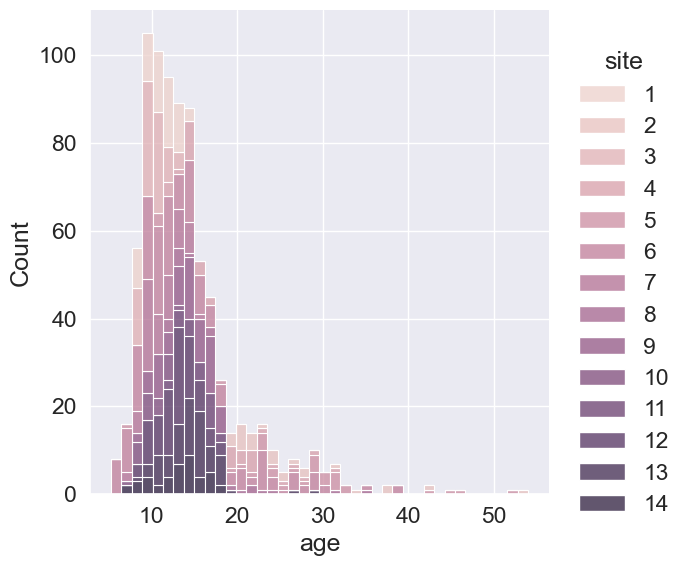

In [5]:
sns.displot(cov, x="age", hue="site", multiple="stack", height=6);

In [6]:
cov.groupby(['site']).describe()

participant_id                                                          \
              count          mean           std      min       25%      50%   
site                                                                          
1              64.0  28790.015625     32.500790  28741.0  28760.75  28790.0   
2              28.0  29557.857143     11.171108  29538.0  29549.75  29556.5   
3              74.0  35145.918919   9591.759984  29274.0  29325.25  29376.0   
4              38.0  50718.868421     24.209861  50685.0  50696.25  50710.5   
5              34.0  51351.058824     48.062422  51318.0  51329.75  51342.5   
6             169.0  44074.124260  10210.898307  29177.0  29242.00  51003.0   
7              64.0  29187.953125    471.097248  28920.0  28949.50  28971.5   
8              18.0  50032.000000     17.829256  50004.0  50022.50  50031.0   
9              74.0  36947.540541  10409.680520  28852.0  28876.25  28898.5   
10             23.0  51179.000000     12.206556  51160.0  51169.50  51179.0   
11             24.0  30013.458333      9.060085  29997.0  30007.75  30014.5   
12             87.0  47053.390805   8580.537395  29729.0  51213.00  51243.0   
13             69.0  50359.826087     44.531204  50272.0  50330.00  50364.0   
14             42.0  50588.857143     26.634446  50551.0  50564.50  50589.0   

                           age             ...                          sex  \
           75%      max  count       mean  ...        75%        max  count   
site                                       ...                                
1     28815.50  28847.0   64.0  10.992074  ...  12.308904  13.906849   64.0   
2     29567.50  29577.0   28.0  26.071429  ...  28.000000  54.000000   28.0   
3     50772.75  50825.0   74.0  10.129867  ...  10.851096  12.898630   74.0   
4     50741.75  50757.0   38.0  18.771053  ...  22.000000  32.000000   38.0   
5     51361.50  51606.0   34.0  27.205882  ...  32.000000  52.000000   34.0   
6     51076.00  51154.0  169.0  14.356959  ...  17.700000  39.100000  169.0   
7     28999.25  30167.0   64.0  10.984375  ...  13.000000  15.000000   64.0   
8     50043.00  50060.0   18.0  18.478333  ...  21.415000  35.200000   18.0   
9     50192.50  50217.0   74.0  13.914730  ...  16.182500  18.000000   74.0   
10    51189.50  51198.0   23.0  10.112278  ...  11.676250  12.936300   23.0   
11    30020.25  30029.0   24.0  15.274306  ...  16.583333  17.833333   24.0   
12    51272.50  51317.0   87.0  12.806252  ...  14.290000  17.940000   87.0   
13    50399.00  50427.0   69.0  14.675362  ...  16.100000  28.800000   69.0   
14    50612.75  50628.0   42.0  13.063571  ...  15.042500  17.830000   42.0   

                                                    
          mean       std  min  25%  50%   75%  max  
site                                                
1     1.390625  0.491747  1.0  1.0  1.0  2.00  2.0  
2     1.250000  0.440959  1.0  1.0  1.0  1.25  2.0  
3     1.121622  0.329079  1.0  1.0  1.0  1.00  2.0  
4     1.131579  0.342570  1.0  1.0  1.0  1.00  2.0  
5     1.205882  0.410426  1.0  1.0  1.0  1.00  2.0  
6     1.189349  0.392950  1.0  1.0  1.0  1.00  2.0  
7     1.437500  0.500000  1.0  1.0  1.0  2.00  2.0  
8     1.333333  0.485071  1.0  1.0  1.0  2.00  2.0  
9     1.175676  0.383142  1.0  1.0  1.0  1.00  2.0  
10    1.304348  0.470472  1.0  1.0  1.0  2.00  2.0  
11    1.250000  0.442326  1.0  1.0  1.0  1.25  2.0  
12    1.137931  0.346827  1.0  1.0  1.0  1.00  2.0  
13    1.202899  0.405104  1.0  1.0  1.0  1.00  2.0  
14    1.309524  0.467901  1.0  1.0  1.0  2.00  2.0  

[14 rows x 24 columns]

## Preprare brain data

### Step 3.

Next, format and combine the MRI data using the following commands. The example data contains cortical thickness maps estimated by running recon-all from Freesurfer (version 6.0). The dimensionality of the data was reduced by using ROIs from the Desikan-Killiany atlas. Including the Euler number as a covariate is also recommended, as this is a proxy metric for data quality. The [Euler number](https://mathworld.wolfram.com/EulerCharacteristic.html) from each subject's recon-all output folder was extracted into a text file and is merged into the cortical thickness data frame. The Euler number is site-specific, thus, to use the same exclusion threshold across sites it is important to center the site by subtracting the site median from all subjects at a site. Then take the square root and multiply by negative one and exclude any subjects with a square root above 10.

In [7]:
#hcpya = pd.read_csv(os.path.join(wdir,'data','HCP1200_aparc_thickness.csv'))
#ixi = pd.read_csv(os.path.join(wdir,'data','IXI_aparc_thickness.csv'))
brain_all= pd.read_csv(os.path.join(wdir,'data','synergy.csv'))
brain_all

,participant_id,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,W19891,W19892,W19893,W19894,W19895,W19896,W19897,W19898,W19899,W19900
0,28741.0,0.515253,0.827356,0.802541,0.734065,0.740846,1.053716,1.145979,0.972056,1.152009,...,1.155020,1.255856,1.257134,1.255228,1.249861,1.226615,1.201151,1.019439,0.730334,0.967149
1,28742.0,0.680996,0.499886,0.552539,0.454228,0.592174,0.537503,0.724374,0.849227,0.681896,...,0.973504,0.822917,0.446487,0.770791,0.688166,0.657618,0.611708,0.546960,0.509996,0.550650
2,28743.0,0.871404,0.972074,0.802588,0.631261,0.758195,0.958946,1.222261,0.931955,1.165245,...,1.043758,0.970726,0.790149,0.692326,0.980498,0.950221,0.821514,0.832828,0.637020,0.673284
3,28744.0,0.876442,0.732395,0.793309,0.530863,0.821121,0.750935,0.861549,0.932419,0.947740,...,1.154984,1.310941,1.286914,1.325035,1.179393,1.175754,1.277914,1.054390,0.768444,0.657071
4,28745.0,0.683181,0.702895,0.459484,0.647461,0.679986,0.754631,0.797583,0.715298,0.755766,...,0.774250,0.900273,0.879657,0.784106,0.843219,0.851348,0.798186,0.741557,0.756166,0.614285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,51367.0,0.358368,0.444145,0.299059,0.204456,0.216787,0.346403,0.272965,0.203142,0.351632,...,0.202284,0.377661,0.332128,0.148787,0.431734,0.399080,0.332430,0.230862,0.370617,0.325878
804,51368.0,0.106463,0.272209,0.109434,0.114426,0.051751,0.230725,0.319203,0.294563,0.176548,...,0.341581,0.361380,0.362064,0.180530,0.313075,0.340316,0.090904,0.189836,0.164892,0.187660
805,51370.0,0.148004,0.143543,0.354426,0.211632,0.077833,0.247971,0.142598,0.115114,0.212031,...,0.342584,0.235572,0.174167,0.315320,0.288422,0.306165,0.286038,0.163538,0.233607,0.107470
806,51372.0,0.181023,0.194407,0.259994,0.081643,0.276056,0.324120,0.264320,0.249578,0.247263,...,0.091472,0.260627,0.116554,0.174604,0.182245,0.139140,0.152933,0.191519,0.218823,0.179351


## Combine covariate & cortical thickness dataframes

### Step 4.	

The normative modeling function requires the covariate predictors and brain features to be in separate text files. However, it is important to first (inner) merge them together, using the following commands, to confirm that the same subjects are in each file and that the rows (representing subjects) align. This requires that both data frames have ‘subject_id’ as a column name. Once this is confirmed, exclude rows with NaN values and separate the brain features and covariate predictors into their own dataframes, using the commands below.

In [8]:
print("Columns in brain_all:", brain_all.columns)
print("Columns in cov:", cov.columns)
benchmark_order = cov['participant_id'].tolist()  # 基准顺序（ASD:0-348，TD:349-807）
all_data = pd.merge(brain_all, cov, how='inner')
all_data = all_data.set_index('participant_id').reindex(benchmark_order).reset_index()
all_data

Columns in brain_all: Index(['participant_id', 'W1', 'W2', 'W3', 'W4', 'W5', 'W6', 'W7', 'W8', 'W9',
       ...
       'W19891', 'W19892', 'W19893', 'W19894', 'W19895', 'W19896', 'W19897',
       'W19898', 'W19899', 'W19900'],
      dtype='object', length=19901)
Columns in cov: Index(['participant_id', 'age', 'sex', 'site'], dtype='object')


,participant_id,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,W19894,W19895,W19896,W19897,W19898,W19899,W19900,age,sex,site
0,28761,0.532870,0.643988,0.513974,0.726756,0.414487,0.809155,0.634633,0.506569,0.593622,...,0.952420,0.892016,0.874346,0.523794,0.756786,0.429811,0.703863,11.484932,1,1
1,28765,0.527402,0.573889,0.445572,0.452056,0.514700,0.488738,0.544761,0.477716,0.662680,...,0.414541,0.708178,0.768190,0.733721,0.699827,0.423482,0.417058,12.065753,1,1
2,28768,0.454851,0.759501,0.655182,0.700933,0.377951,0.475335,0.782719,0.702134,0.822654,...,0.782695,0.770482,0.754802,0.712809,0.538037,0.486398,0.542066,11.358904,1,1
3,28771,0.855522,0.882623,0.669667,0.855112,0.733463,1.145358,0.944054,1.024510,1.061341,...,0.790617,0.864619,1.071411,0.848711,0.574665,1.013043,0.429775,12.600000,1,1
4,28778,0.598485,0.701728,0.729693,0.499760,0.429000,0.714265,0.794592,0.784305,0.919764,...,0.389099,0.711994,0.804577,0.658546,0.630352,0.459407,0.497572,9.983562,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,51305,0.067429,0.226461,0.132132,0.150689,0.110464,0.287758,0.293375,0.227840,0.294204,...,0.457900,0.313665,0.333614,0.348343,0.342530,0.193458,0.133903,12.640000,2,12
804,51366,0.267677,0.295069,0.324103,0.255487,0.401957,0.476561,0.302434,0.179768,0.410870,...,0.500244,0.505300,0.490768,0.628862,0.485875,0.510111,0.376302,32.000000,2,5
805,51368,0.106463,0.272209,0.109434,0.114426,0.051751,0.230725,0.319203,0.294563,0.176548,...,0.180530,0.313075,0.340316,0.090904,0.189836,0.164892,0.187660,28.000000,2,5
806,51370,0.148004,0.143543,0.354426,0.211632,0.077833,0.247971,0.142598,0.115114,0.212031,...,0.315320,0.288422,0.306165,0.286038,0.163538,0.233607,0.107470,32.000000,2,5


In [9]:
# Create a list of all the ROIs you want to run a normative model for (add additional names to this list if you would like to include other brain regions from the Desikan-Killian atlas)
#roi_ids = ['W1',
#           'W2',
#           'W3',
#           'W4',
#           'W5']
roi_ids = [f'W{i}' for i in range(1, 19901)]  # 生成 W1 到 W19900
print("Columns in all_data:", all_data.columns)
print("roi_ids:", roi_ids)

Columns in all_data: Index(['participant_id', 'W1', 'W2', 'W3', 'W4', 'W5', 'W6', 'W7', 'W8', 'W9',
       ...
       'W19894', 'W19895', 'W19896', 'W19897', 'W19898', 'W19899', 'W19900',
       'age', 'sex', 'site'],
      dtype='object', length=19904)
roi_ids: ['W1', 'W2', 'W3', 'W4', 'W5', 'W6', 'W7', 'W8', 'W9', 'W10', 'W11', 'W12', 'W13', 'W14', 'W15', 'W16', 'W17', 'W18', 'W19', 'W20', 'W21', 'W22', 'W23', 'W24', 'W25', 'W26', 'W27', 'W28', 'W29', 'W30', 'W31', 'W32', 'W33', 'W34', 'W35', 'W36', 'W37', 'W38', 'W39', 'W40', 'W41', 'W42', 'W43', 'W44', 'W45', 'W46', 'W47', 'W48', 'W49', 'W50', 'W51', 'W52', 'W53', 'W54', 'W55', 'W56', 'W57', 'W58', 'W59', 'W60', 'W61', 'W62', 'W63', 'W64', 'W65', 'W66', 'W67', 'W68', 'W69', 'W70', 'W71', 'W72', 'W73', 'W74', 'W75', 'W76', 'W77', 'W78', 'W79', 'W80', 'W81', 'W82', 'W83', 'W84', 'W85', 'W86', 'W87', 'W88', 'W89', 'W90', 'W91', 'W92', 'W93', 'W94', 'W95', 'W96', 'W97', 'W98', 'W99', 'W100', 'W101', 'W102', 'W103', 'W104', 'W105', 'W10

In [10]:
# Remove any subjects that have NaN variables in any of the columns
all_data.dropna(subset=roi_ids, inplace=True)

In [11]:
# 特征
all_data_features = all_data[roi_ids]
#协变量
all_data_covariates = all_data[['age','sex','site']]
print(all_data_covariates)


           age  sex  site
0    11.484932    1     1
1    12.065753    1     1
2    11.358904    1     1
3    12.600000    1     1
4     9.983562    1     1
..         ...  ...   ...
803  12.640000    2    12
804  32.000000    2     5
805  28.000000    2     5
806  32.000000    2     5
807  46.000000    2     5

[808 rows x 3 columns]


**CRITICAL STEP:** `roi_ids` is a variable that represents which brain areas will be modeled and can be used to select subsets of the data frame if you do not wish to run models for the whole brain.

## Add variable to model site/scanner effects

### Step 5.	

Currently, the different sites are coded in a single column (named ‘site’) and are represented as a string data type. However, the PCNtoolkit requires binary variables. Use the pandas package as follows to address this, which has a built-in function, `pd.get_dummies`, that takes in the string ‘site’ column and dummy encodes the site variable so that there is now a column for each site and the columns contain binary variables (0=not in this site, 1=present in this site).

In [12]:
all_data_covariates = pd.get_dummies(all_data_covariates, columns=['site'])
all_data_covariates

,age,sex,site_1,site_2,site_3,site_4,site_5,site_6,site_7,site_8,site_9,site_10,site_11,site_12,site_13,site_14
0,11.484932,1,True,False,False,False,False,False,False,False,False,False,False,False,False,False
1,12.065753,1,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,11.358904,1,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3,12.600000,1,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,9.983562,1,True,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,12.640000,2,False,False,False,False,False,False,False,False,False,False,False,True,False,False
804,32.000000,2,False,False,False,False,True,False,False,False,False,False,False,False,False,False
805,28.000000,2,False,False,False,False,True,False,False,False,False,False,False,False,False,False
806,32.000000,2,False,False,False,False,True,False,False,False,False,False,False,False,False,False


## Train/test split

### Step 6.	

In this example, we use 80% of the data for training and 20% for testing. Please carefully read the experimental design section on train/test split considerations when using your own data in this step. Using a function from scikit-learn (`train_test_split`), stratify the train/test split using the site variable to make sure that the train/test sets both contain data from all sites, using the following commands. Next, confirm that your train and test arrays are the same size (rows), using the following commands. You do not need the same size columns (subjects) in the train and test arrays, but the rows represent the covariate and responses which should be the same across train and test arrays.

In [13]:
#X_train, X_test, y_train, y_test = train_test_split(all_data_covariates, all_data_features, stratify=all_data['site'], test_size=0.2, random_state=42)
# 按行号划分：前349行为ASD组（测试集），后459行为TD组（训练集）
test_indices = list(range(0, 349))      # 前349行（索引0-348）
train_indices = list(range(349, 808))   # 后459行（索引349-807）
# 从协变量和特征数据框中提取训练集和测试集
X_train = all_data_covariates.iloc[train_indices].copy()  # TD组协变量（训练集）
y_train = all_data_features.iloc[train_indices].copy()     # TD组特征（训练集）
X_test = all_data_covariates.iloc[test_indices].copy()    # ASD组协变量（测试集）
y_test = all_data_features.iloc[test_indices].copy()       # ASD组特征（测试集）
print(f"训练集（TD组）样本量: {len(X_train)}, 测试集（ASD组）样本量: {len(X_test)}")
print(f"训练集特征维度: {y_train.shape}, 测试集特征维度: {y_test.shape}")
X_test

训练集（TD组）样本量: 459, 测试集（ASD组）样本量: 349
训练集特征维度: (459, 19900), 测试集特征维度: (349, 19900)


,age,sex,site_1,site_2,site_3,site_4,site_5,site_6,site_7,site_8,site_9,site_10,site_11,site_12,site_13,site_14
0,11.484932,1,True,False,False,False,False,False,False,False,False,False,False,False,False,False
1,12.065753,1,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,11.358904,1,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3,12.600000,1,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,9.983562,1,True,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,17.530000,2,False,False,False,False,False,False,False,False,False,False,False,True,False,False
345,14.140000,2,False,False,False,False,False,False,False,False,False,False,False,True,False,False
346,45.000000,2,False,False,False,False,True,False,False,False,False,False,False,False,False,False
347,32.000000,2,False,False,False,False,True,False,False,False,False,False,False,False,False,False


Verify that your train & test arrays are the same size

In [14]:
tr_cov_size = X_train.shape
tr_resp_size = y_train.shape
te_cov_size = X_test.shape
te_resp_size = y_test.shape
print("Train covariate size is: ", tr_cov_size)
print("Test covariate size is: ", te_cov_size)
print("Train response size is: ", tr_resp_size)
print("Test response size is: ", te_resp_size)

Train covariate size is:  (459, 16)
Test covariate size is:  (349, 16)
Train response size is:  (459, 19900)
Test response size is:  (349, 19900)


**CRITICAL STEP:** The model would not learn the site effects if all the data from one site was only in the test set. Therefore, we stratify the train/test split using the site variable.

### Step 7.	

When the data were split into train and test sets, the row index was not reset. This means that the row index in the train and test data frames still correspond to the full data frame (before splitting the data occurred). The test set row index informs which subjects belong to which site, and this information is needed to evaluate per site performance metrics. Resetting the row index of the train/test data frames fixes this issue. Then extract the site row indices to a list (one list per site) and create a list called `site_names` that is used to decide which sites to evaluate model performance for, as follows:

In [15]:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)


In [16]:
# Get indices of all the subejcts in each site so that we can evaluate the test set metrics per site
# 按站点计算测试指标
site_1_idx = X_test.index[X_test['site_1'] == 1].to_list()
site_2_idx = X_test.index[X_test['site_2'] == 1].to_list()
site_3_idx = X_test.index[X_test['site_3'] == 1].to_list()
site_4_idx = X_test.index[X_test['site_4'] == 1].to_list()
site_5_idx = X_test.index[X_test['site_5'] == 1].to_list()
site_6_idx = X_test.index[X_test['site_6'] == 1].to_list()
site_7_idx = X_test.index[X_test['site_7'] == 1].to_list()
site_8_idx = X_test.index[X_test['site_8'] == 1].to_list()
site_9_idx = X_test.index[X_test['site_9'] == 1].to_list()
site_10_idx = X_test.index[X_test['site_10'] == 1].to_list()
site_11_idx = X_test.index[X_test['site_11'] == 1].to_list()
site_12_idx = X_test.index[X_test['site_12'] == 1].to_list()
site_13_idx = X_test.index[X_test['site_13'] == 1].to_list()
site_14_idx = X_test.index[X_test['site_14'] == 1].to_list()


In [17]:
# Save the site indices into a single list
sites = [site_1_idx,site_2_idx,site_3_idx,site_4_idx,site_5_idx,site_6_idx,site_7_idx,site_8_idx,site_9_idx,site_10_idx,site_11_idx,site_12_idx,site_13_idx,site_14_idx]
sites

[[0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  284,
  285,
  286,
  287],
 [98, 99, 100, 101, 102, 103, 305, 306, 307],
 [91,
  92,
  93,
  94,
  95,
  96,
  97,
  193,
  194,
  195,
  196,
  301,
  302,
  303,
  304,
  328,
  329],
 [174,
  175,
  176,
  177,
  178,
  179,
  180,
  181,
  182,
  183,
  184,
  185,
  186,
  187,
  188,
  189,
  190,
  191,
  192,
  326,
  327],
 [275, 276, 277, 278, 279, 280, 281, 282, 283, 346, 347, 348],
 [63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  197,
  198,
  199,
  200,
  201,
  202,
  203,
  204,
  205,
  206,
  207,
  208,
  209,
  210,
  211,
  212,
  213,
  214,
  215,
  216,
  217,
  218,
  219,
  220,
  221,
  222,
  223,
  224,
  225,
  226,
  227,
  228,
  229,
  230,
  231,
  232,
  297,
  298,
  299,
  300,
  330,
  331,
  332,
  333,
  334,
  

In [18]:
# Create a list with sites names to use in evaluating per-site metrics
site_names = ['site_1','site_2','site_3', 'site_4','site_5','site_6','site_7','site_8','site_9','site_10','site_11','site_12','site_13','site_14']
site_names
# 统计测试集各站点的样本数（独热编码列）
site_cols = [col for col in X_test.columns if col.startswith('site_')]
test_site_counts = X_test[site_cols].sum(axis=0)
print("测试集各站点样本量：")
print(test_site_counts)

测试集各站点样本量：
site_1     25
site_2      9
site_3     17
site_4     21
site_5     12
site_6     78
site_7     25
site_8     10
site_9     38
site_10    12
site_11    11
site_12    45
site_13    25
site_14    21
dtype: int64


## Setup output directories

## Step 8.	

Save each brain region to its own text file (organized in separate directories) using the following commands, because for each response variable, Y (e.g., brain region) we fit a separate normative model.

In [19]:
for c in y_train.columns:
    y_train[c].to_csv('resp_tr_' + c + '.txt', header=False, index=False)

In [20]:
X_train.to_csv('cov_tr.txt', sep = '\t', header=False, index = False)

In [21]:
y_train.to_csv('resp_tr.txt', sep = '\t', header=False, index = False)

In [22]:
for c in y_test.columns:
    y_test[c].to_csv('resp_te_' + c + '.txt', header=False, index=False)

In [23]:
X_test.to_csv('cov_te.txt', sep = '\t', header=False, index = False)

In [24]:
y_test.to_csv('resp_te.txt', sep = '\t', header=False, index = False)

In [25]:
#! if [[ ! -e ROI_models/ ]]; then mkdir ROI_models; f
import os
import shutil

# 读取 roi_dir_names 文件
roi_dir_path = r"C:/Users/11574/PCNtoolkit-demo/data/W_labels.txt"

with open(roi_dir_path, 'r') as f:
    roi_names = f.read().splitlines()

# 确保 ROI_models 目录存在
if not os.path.exists('ROI_models'):
    os.makedirs('ROI_models')

# 遍历每个 ROI 名称
for roi_name in roi_names:
    # 创建以 roi_name 命名的子文件夹
    roi_dir = os.path.join('ROI_models', roi_name)
    if not os.path.exists(roi_dir):
        os.makedirs(roi_dir)
    
    # 检查并复制响应文件（如果存在）
    resp_tr_file = f'resp_tr_{roi_name}.txt'
    if os.path.exists(resp_tr_file):
        shutil.copy(resp_tr_file, os.path.join(roi_dir, 'resp_tr.txt'))
        shutil.copy(f'resp_te_{roi_name}.txt', os.path.join(roi_dir, 'resp_te.txt'))
    
    # 复制协变量文件（无论是否存在响应文件）
    if os.path.exists('cov_tr.txt'):
        shutil.copy('cov_tr.txt', os.path.join(roi_dir, 'cov_tr.txt'))
    if os.path.exists('cov_te.txt'):
        shutil.copy('cov_te.txt', os.path.join(roi_dir, 'cov_te.txt'))

print(f"已成功在 ROI_models 目录下创建 {len(roi_names)} 个子文件夹")

已成功在 ROI_models 目录下创建 19900 个子文件夹


In [26]:
# Note: please change the path in the following to wdir (depending on whether you are running on colab or not)

#import os
#
## 读取 roi_dir_names 文件
#roi_dir_path = r"C:/Users/11574/PCNtoolkit-demo/data/W_labels"
#
#with open(roi_dir_path, 'r') as f:
#    roi_names = f.read().splitlines()
#
## 确保 ROI_models 目录存在
#if not os.path.exists('ROI_models'):
#    os.makedirs('ROI_models')
#
## 遍历每个 ROI 名称
#for roi_name in roi_names:
#    resp_tr_file = f'resp_tr_{roi_name}.txt'
#    if os.path.exists(resp_tr_file):
#        roi_dir = os.path.join('ROI_models', roi_name)
#        if not os.path.exists(roi_dir):
#            os.makedirs(roi_dir)
#        # 复制文件
#        import shutil
#        shutil.copy(resp_tr_file, os.path.join(roi_dir, 'resp_tr.txt'))
#        shutil.copy(f'resp_te_{roi_name}.txt', os.path.join(roi_dir, 'resp_te.txt'))
#        shutil.copy('cov_tr.txt', os.path.join(roi_dir, 'cov_tr.txt'))
#        shutil.copy('cov_te.txt', os.path.join(roi_dir, 'cov_te.txt'))
#

# Algorithm & Modeling

## Basis expansion using B-Splines

### Step 9.	

Now, set up a B-spline basis set that allows us to perform nonlinear regression using a linear model, using the following commands. This basis is deliberately chosen to not to be too flexible so that it can only model relatively slowly varying trends. To increase the flexibility of the model you can change the parameterization (e.g., by adding knot points to the B-spline basis or increasing the order of the interpolating polynomial). Note that in the neuroimaging literature, it is more common to use a polynomial basis expansion for this. Piecewise polynomials like B-splines are superior to polynomial basis expansions because they do not introduce a global curvature. For further details on the use of B-splines see [Fraza et al](https://pubmed.ncbi.nlm.nih.gov/34798518/).

In [27]:

# set this path to wherever your ROI_models folder is located (where you copied all of the covariate & response text files to in Step 4)
data_dir = os.path.join(wdir,'tutorials','BLR_protocol','ROI_models')

# Create a cubic B-spline basis (used for regression)
#xmin = 7#16 # xmin & xmax are the boundaries for ages of participants in the dataset
#xmax = 50#90
# 1. 计算真实年龄边界
xmin = all_data['age'].min()        
xmax = all_data['age'].max()                           
B = create_bspline_basis(xmin, xmax)
# create the basis expansion for the covariates for each of the 
for roi in roi_ids: 
    print('Creating basis expansion for ROI:', roi)
    roi_dir = os.path.join(data_dir, roi)
    os.chdir(roi_dir)
    # create output dir 
    os.makedirs(os.path.join(roi_dir,'blr'), exist_ok=True)
    
     # 手动处理非数值数据
    def process_file(file_path):
        with open(file_path, 'r') as f:
            lines = f.readlines()
        new_lines = []
        for line in lines:
            new_line = []
            for value in line.strip().split():
                if value == 'True':
                    new_line.append('1')
                elif value == 'False':
                    new_line.append('0')
                else:
                    new_line.append(value)
            new_lines.append(' '.join(new_line))
        with open(file_path, 'w') as f:
            f.write('\n'.join(new_lines))

    # 处理训练集和测试集的协变量文件
    cov_tr_path = os.path.join(roi_dir, 'cov_tr.txt')
    cov_te_path = os.path.join(roi_dir, 'cov_te.txt')
    process_file(cov_tr_path)
    process_file(cov_te_path)
    
    # load train & test covariate data matrices
    #X_tr = np.loadtxt(os.path.join(roi_dir, 'cov_tr.txt'))
    #X_te = np.loadtxt(os.path.join(roi_dir, 'cov_te.txt'))
    # 加载原始协变量（假设包含年龄、性别、站点等）
    X_tr = np.loadtxt(cov_tr_path)
    X_te = np.loadtxt(cov_te_path)
    # add intercept column 
    # 添加截距列（全1向量，用于模型中的常数项）
    X_tr = np.concatenate((X_tr, np.ones((X_tr.shape[0],1))), axis=1)
    X_te = np.concatenate((X_te, np.ones((X_te.shape[0],1))), axis=1)
    np.savetxt(os.path.join(roi_dir, 'cov_int_tr.txt'), X_tr)
    np.savetxt(os.path.join(roi_dir, 'cov_int_te.txt'), X_te)
    # 生成训练集和测试集的B样条基矩阵
    # create Bspline basis set 
    Phi = np.array([B(i) for i in X_tr[:,0]])
    Phis = np.array([B(i) for i in X_te[:,0]])
    # 合并基函数到协变量矩阵
    X_tr = np.concatenate((X_tr, Phi), axis=1)
    X_te = np.concatenate((X_te, Phis), axis=1)
    np.savetxt(os.path.join(roi_dir, 'cov_bspline_tr.txt'), X_tr)
    np.savetxt(os.path.join(roi_dir, 'cov_bspline_te.txt'), X_te)

Creating basis expansion for ROI: W1
Creating basis expansion for ROI: W2
Creating basis expansion for ROI: W3
Creating basis expansion for ROI: W4
Creating basis expansion for ROI: W5
Creating basis expansion for ROI: W6
Creating basis expansion for ROI: W7
Creating basis expansion for ROI: W8
Creating basis expansion for ROI: W9
Creating basis expansion for ROI: W10
Creating basis expansion for ROI: W11
Creating basis expansion for ROI: W12
Creating basis expansion for ROI: W13
Creating basis expansion for ROI: W14
Creating basis expansion for ROI: W15
Creating basis expansion for ROI: W16
Creating basis expansion for ROI: W17
Creating basis expansion for ROI: W18
Creating basis expansion for ROI: W19
Creating basis expansion for ROI: W20
Creating basis expansion for ROI: W21
Creating basis expansion for ROI: W22
Creating basis expansion for ROI: W23
Creating basis expansion for ROI: W24
Creating basis expansion for ROI: W25
Creating basis expansion for ROI: W26
Creating basis expans

Creating basis expansion for ROI: W214
Creating basis expansion for ROI: W215
Creating basis expansion for ROI: W216
Creating basis expansion for ROI: W217
Creating basis expansion for ROI: W218
Creating basis expansion for ROI: W219
Creating basis expansion for ROI: W220
Creating basis expansion for ROI: W221
Creating basis expansion for ROI: W222
Creating basis expansion for ROI: W223
Creating basis expansion for ROI: W224
Creating basis expansion for ROI: W225
Creating basis expansion for ROI: W226
Creating basis expansion for ROI: W227
Creating basis expansion for ROI: W228
Creating basis expansion for ROI: W229
Creating basis expansion for ROI: W230
Creating basis expansion for ROI: W231
Creating basis expansion for ROI: W232
Creating basis expansion for ROI: W233
Creating basis expansion for ROI: W234
Creating basis expansion for ROI: W235
Creating basis expansion for ROI: W236
Creating basis expansion for ROI: W237
Creating basis expansion for ROI: W238
Creating basis expansion 

Creating basis expansion for ROI: W427
Creating basis expansion for ROI: W428
Creating basis expansion for ROI: W429
Creating basis expansion for ROI: W430
Creating basis expansion for ROI: W431
Creating basis expansion for ROI: W432
Creating basis expansion for ROI: W433
Creating basis expansion for ROI: W434
Creating basis expansion for ROI: W435
Creating basis expansion for ROI: W436
Creating basis expansion for ROI: W437
Creating basis expansion for ROI: W438
Creating basis expansion for ROI: W439
Creating basis expansion for ROI: W440
Creating basis expansion for ROI: W441
Creating basis expansion for ROI: W442
Creating basis expansion for ROI: W443
Creating basis expansion for ROI: W444
Creating basis expansion for ROI: W445
Creating basis expansion for ROI: W446
Creating basis expansion for ROI: W447
Creating basis expansion for ROI: W448
Creating basis expansion for ROI: W449
Creating basis expansion for ROI: W450
Creating basis expansion for ROI: W451
Creating basis expansion 

Creating basis expansion for ROI: W639
Creating basis expansion for ROI: W640
Creating basis expansion for ROI: W641
Creating basis expansion for ROI: W642
Creating basis expansion for ROI: W643
Creating basis expansion for ROI: W644
Creating basis expansion for ROI: W645
Creating basis expansion for ROI: W646
Creating basis expansion for ROI: W647
Creating basis expansion for ROI: W648
Creating basis expansion for ROI: W649
Creating basis expansion for ROI: W650
Creating basis expansion for ROI: W651
Creating basis expansion for ROI: W652
Creating basis expansion for ROI: W653
Creating basis expansion for ROI: W654
Creating basis expansion for ROI: W655
Creating basis expansion for ROI: W656
Creating basis expansion for ROI: W657
Creating basis expansion for ROI: W658
Creating basis expansion for ROI: W659
Creating basis expansion for ROI: W660
Creating basis expansion for ROI: W661
Creating basis expansion for ROI: W662
Creating basis expansion for ROI: W663
Creating basis expansion 

Creating basis expansion for ROI: W851
Creating basis expansion for ROI: W852
Creating basis expansion for ROI: W853
Creating basis expansion for ROI: W854
Creating basis expansion for ROI: W855
Creating basis expansion for ROI: W856
Creating basis expansion for ROI: W857
Creating basis expansion for ROI: W858
Creating basis expansion for ROI: W859
Creating basis expansion for ROI: W860
Creating basis expansion for ROI: W861
Creating basis expansion for ROI: W862
Creating basis expansion for ROI: W863
Creating basis expansion for ROI: W864
Creating basis expansion for ROI: W865
Creating basis expansion for ROI: W866
Creating basis expansion for ROI: W867
Creating basis expansion for ROI: W868
Creating basis expansion for ROI: W869
Creating basis expansion for ROI: W870
Creating basis expansion for ROI: W871
Creating basis expansion for ROI: W872
Creating basis expansion for ROI: W873
Creating basis expansion for ROI: W874
Creating basis expansion for ROI: W875
Creating basis expansion 

Creating basis expansion for ROI: W1063
Creating basis expansion for ROI: W1064
Creating basis expansion for ROI: W1065
Creating basis expansion for ROI: W1066
Creating basis expansion for ROI: W1067
Creating basis expansion for ROI: W1068
Creating basis expansion for ROI: W1069
Creating basis expansion for ROI: W1070
Creating basis expansion for ROI: W1071
Creating basis expansion for ROI: W1072
Creating basis expansion for ROI: W1073
Creating basis expansion for ROI: W1074
Creating basis expansion for ROI: W1075
Creating basis expansion for ROI: W1076
Creating basis expansion for ROI: W1077
Creating basis expansion for ROI: W1078
Creating basis expansion for ROI: W1079
Creating basis expansion for ROI: W1080
Creating basis expansion for ROI: W1081
Creating basis expansion for ROI: W1082
Creating basis expansion for ROI: W1083
Creating basis expansion for ROI: W1084
Creating basis expansion for ROI: W1085
Creating basis expansion for ROI: W1086
Creating basis expansion for ROI: W1087


Creating basis expansion for ROI: W1270
Creating basis expansion for ROI: W1271
Creating basis expansion for ROI: W1272
Creating basis expansion for ROI: W1273
Creating basis expansion for ROI: W1274
Creating basis expansion for ROI: W1275
Creating basis expansion for ROI: W1276
Creating basis expansion for ROI: W1277
Creating basis expansion for ROI: W1278
Creating basis expansion for ROI: W1279
Creating basis expansion for ROI: W1280
Creating basis expansion for ROI: W1281
Creating basis expansion for ROI: W1282
Creating basis expansion for ROI: W1283
Creating basis expansion for ROI: W1284
Creating basis expansion for ROI: W1285
Creating basis expansion for ROI: W1286
Creating basis expansion for ROI: W1287
Creating basis expansion for ROI: W1288
Creating basis expansion for ROI: W1289
Creating basis expansion for ROI: W1290
Creating basis expansion for ROI: W1291
Creating basis expansion for ROI: W1292
Creating basis expansion for ROI: W1293
Creating basis expansion for ROI: W1294


Creating basis expansion for ROI: W1475
Creating basis expansion for ROI: W1476
Creating basis expansion for ROI: W1477
Creating basis expansion for ROI: W1478
Creating basis expansion for ROI: W1479
Creating basis expansion for ROI: W1480
Creating basis expansion for ROI: W1481
Creating basis expansion for ROI: W1482
Creating basis expansion for ROI: W1483
Creating basis expansion for ROI: W1484
Creating basis expansion for ROI: W1485
Creating basis expansion for ROI: W1486
Creating basis expansion for ROI: W1487
Creating basis expansion for ROI: W1488
Creating basis expansion for ROI: W1489
Creating basis expansion for ROI: W1490
Creating basis expansion for ROI: W1491
Creating basis expansion for ROI: W1492
Creating basis expansion for ROI: W1493
Creating basis expansion for ROI: W1494
Creating basis expansion for ROI: W1495
Creating basis expansion for ROI: W1496
Creating basis expansion for ROI: W1497
Creating basis expansion for ROI: W1498
Creating basis expansion for ROI: W1499


Creating basis expansion for ROI: W1682
Creating basis expansion for ROI: W1683
Creating basis expansion for ROI: W1684
Creating basis expansion for ROI: W1685
Creating basis expansion for ROI: W1686
Creating basis expansion for ROI: W1687
Creating basis expansion for ROI: W1688
Creating basis expansion for ROI: W1689
Creating basis expansion for ROI: W1690
Creating basis expansion for ROI: W1691
Creating basis expansion for ROI: W1692
Creating basis expansion for ROI: W1693
Creating basis expansion for ROI: W1694
Creating basis expansion for ROI: W1695
Creating basis expansion for ROI: W1696
Creating basis expansion for ROI: W1697
Creating basis expansion for ROI: W1698
Creating basis expansion for ROI: W1699
Creating basis expansion for ROI: W1700
Creating basis expansion for ROI: W1701
Creating basis expansion for ROI: W1702
Creating basis expansion for ROI: W1703
Creating basis expansion for ROI: W1704
Creating basis expansion for ROI: W1705
Creating basis expansion for ROI: W1706


Creating basis expansion for ROI: W1888
Creating basis expansion for ROI: W1889
Creating basis expansion for ROI: W1890
Creating basis expansion for ROI: W1891
Creating basis expansion for ROI: W1892
Creating basis expansion for ROI: W1893
Creating basis expansion for ROI: W1894
Creating basis expansion for ROI: W1895
Creating basis expansion for ROI: W1896
Creating basis expansion for ROI: W1897
Creating basis expansion for ROI: W1898
Creating basis expansion for ROI: W1899
Creating basis expansion for ROI: W1900
Creating basis expansion for ROI: W1901
Creating basis expansion for ROI: W1902
Creating basis expansion for ROI: W1903
Creating basis expansion for ROI: W1904
Creating basis expansion for ROI: W1905
Creating basis expansion for ROI: W1906
Creating basis expansion for ROI: W1907
Creating basis expansion for ROI: W1908
Creating basis expansion for ROI: W1909
Creating basis expansion for ROI: W1910
Creating basis expansion for ROI: W1911
Creating basis expansion for ROI: W1912


Creating basis expansion for ROI: W2094
Creating basis expansion for ROI: W2095
Creating basis expansion for ROI: W2096
Creating basis expansion for ROI: W2097
Creating basis expansion for ROI: W2098
Creating basis expansion for ROI: W2099
Creating basis expansion for ROI: W2100
Creating basis expansion for ROI: W2101
Creating basis expansion for ROI: W2102
Creating basis expansion for ROI: W2103
Creating basis expansion for ROI: W2104
Creating basis expansion for ROI: W2105
Creating basis expansion for ROI: W2106
Creating basis expansion for ROI: W2107
Creating basis expansion for ROI: W2108
Creating basis expansion for ROI: W2109
Creating basis expansion for ROI: W2110
Creating basis expansion for ROI: W2111
Creating basis expansion for ROI: W2112
Creating basis expansion for ROI: W2113
Creating basis expansion for ROI: W2114
Creating basis expansion for ROI: W2115
Creating basis expansion for ROI: W2116
Creating basis expansion for ROI: W2117
Creating basis expansion for ROI: W2118


Creating basis expansion for ROI: W2301
Creating basis expansion for ROI: W2302
Creating basis expansion for ROI: W2303
Creating basis expansion for ROI: W2304
Creating basis expansion for ROI: W2305
Creating basis expansion for ROI: W2306
Creating basis expansion for ROI: W2307
Creating basis expansion for ROI: W2308
Creating basis expansion for ROI: W2309
Creating basis expansion for ROI: W2310
Creating basis expansion for ROI: W2311
Creating basis expansion for ROI: W2312
Creating basis expansion for ROI: W2313
Creating basis expansion for ROI: W2314
Creating basis expansion for ROI: W2315
Creating basis expansion for ROI: W2316
Creating basis expansion for ROI: W2317
Creating basis expansion for ROI: W2318
Creating basis expansion for ROI: W2319
Creating basis expansion for ROI: W2320
Creating basis expansion for ROI: W2321
Creating basis expansion for ROI: W2322
Creating basis expansion for ROI: W2323
Creating basis expansion for ROI: W2324
Creating basis expansion for ROI: W2325


Creating basis expansion for ROI: W2507
Creating basis expansion for ROI: W2508
Creating basis expansion for ROI: W2509
Creating basis expansion for ROI: W2510
Creating basis expansion for ROI: W2511
Creating basis expansion for ROI: W2512
Creating basis expansion for ROI: W2513
Creating basis expansion for ROI: W2514
Creating basis expansion for ROI: W2515
Creating basis expansion for ROI: W2516
Creating basis expansion for ROI: W2517
Creating basis expansion for ROI: W2518
Creating basis expansion for ROI: W2519
Creating basis expansion for ROI: W2520
Creating basis expansion for ROI: W2521
Creating basis expansion for ROI: W2522
Creating basis expansion for ROI: W2523
Creating basis expansion for ROI: W2524
Creating basis expansion for ROI: W2525
Creating basis expansion for ROI: W2526
Creating basis expansion for ROI: W2527
Creating basis expansion for ROI: W2528
Creating basis expansion for ROI: W2529
Creating basis expansion for ROI: W2530
Creating basis expansion for ROI: W2531


Creating basis expansion for ROI: W2714
Creating basis expansion for ROI: W2715
Creating basis expansion for ROI: W2716
Creating basis expansion for ROI: W2717
Creating basis expansion for ROI: W2718
Creating basis expansion for ROI: W2719
Creating basis expansion for ROI: W2720
Creating basis expansion for ROI: W2721
Creating basis expansion for ROI: W2722
Creating basis expansion for ROI: W2723
Creating basis expansion for ROI: W2724
Creating basis expansion for ROI: W2725
Creating basis expansion for ROI: W2726
Creating basis expansion for ROI: W2727
Creating basis expansion for ROI: W2728
Creating basis expansion for ROI: W2729
Creating basis expansion for ROI: W2730
Creating basis expansion for ROI: W2731
Creating basis expansion for ROI: W2732
Creating basis expansion for ROI: W2733
Creating basis expansion for ROI: W2734
Creating basis expansion for ROI: W2735
Creating basis expansion for ROI: W2736
Creating basis expansion for ROI: W2737
Creating basis expansion for ROI: W2738


Creating basis expansion for ROI: W2920
Creating basis expansion for ROI: W2921
Creating basis expansion for ROI: W2922
Creating basis expansion for ROI: W2923
Creating basis expansion for ROI: W2924
Creating basis expansion for ROI: W2925
Creating basis expansion for ROI: W2926
Creating basis expansion for ROI: W2927
Creating basis expansion for ROI: W2928
Creating basis expansion for ROI: W2929
Creating basis expansion for ROI: W2930
Creating basis expansion for ROI: W2931
Creating basis expansion for ROI: W2932
Creating basis expansion for ROI: W2933
Creating basis expansion for ROI: W2934
Creating basis expansion for ROI: W2935
Creating basis expansion for ROI: W2936
Creating basis expansion for ROI: W2937
Creating basis expansion for ROI: W2938
Creating basis expansion for ROI: W2939
Creating basis expansion for ROI: W2940
Creating basis expansion for ROI: W2941
Creating basis expansion for ROI: W2942
Creating basis expansion for ROI: W2943
Creating basis expansion for ROI: W2944


Creating basis expansion for ROI: W3126
Creating basis expansion for ROI: W3127
Creating basis expansion for ROI: W3128
Creating basis expansion for ROI: W3129
Creating basis expansion for ROI: W3130
Creating basis expansion for ROI: W3131
Creating basis expansion for ROI: W3132
Creating basis expansion for ROI: W3133
Creating basis expansion for ROI: W3134
Creating basis expansion for ROI: W3135
Creating basis expansion for ROI: W3136
Creating basis expansion for ROI: W3137
Creating basis expansion for ROI: W3138
Creating basis expansion for ROI: W3139
Creating basis expansion for ROI: W3140
Creating basis expansion for ROI: W3141
Creating basis expansion for ROI: W3142
Creating basis expansion for ROI: W3143
Creating basis expansion for ROI: W3144
Creating basis expansion for ROI: W3145
Creating basis expansion for ROI: W3146
Creating basis expansion for ROI: W3147
Creating basis expansion for ROI: W3148
Creating basis expansion for ROI: W3149
Creating basis expansion for ROI: W3150


Creating basis expansion for ROI: W3333
Creating basis expansion for ROI: W3334
Creating basis expansion for ROI: W3335
Creating basis expansion for ROI: W3336
Creating basis expansion for ROI: W3337
Creating basis expansion for ROI: W3338
Creating basis expansion for ROI: W3339
Creating basis expansion for ROI: W3340
Creating basis expansion for ROI: W3341
Creating basis expansion for ROI: W3342
Creating basis expansion for ROI: W3343
Creating basis expansion for ROI: W3344
Creating basis expansion for ROI: W3345
Creating basis expansion for ROI: W3346
Creating basis expansion for ROI: W3347
Creating basis expansion for ROI: W3348
Creating basis expansion for ROI: W3349
Creating basis expansion for ROI: W3350
Creating basis expansion for ROI: W3351
Creating basis expansion for ROI: W3352
Creating basis expansion for ROI: W3353
Creating basis expansion for ROI: W3354
Creating basis expansion for ROI: W3355
Creating basis expansion for ROI: W3356
Creating basis expansion for ROI: W3357


Creating basis expansion for ROI: W3539
Creating basis expansion for ROI: W3540
Creating basis expansion for ROI: W3541
Creating basis expansion for ROI: W3542
Creating basis expansion for ROI: W3543
Creating basis expansion for ROI: W3544
Creating basis expansion for ROI: W3545
Creating basis expansion for ROI: W3546
Creating basis expansion for ROI: W3547
Creating basis expansion for ROI: W3548
Creating basis expansion for ROI: W3549
Creating basis expansion for ROI: W3550
Creating basis expansion for ROI: W3551
Creating basis expansion for ROI: W3552
Creating basis expansion for ROI: W3553
Creating basis expansion for ROI: W3554
Creating basis expansion for ROI: W3555
Creating basis expansion for ROI: W3556
Creating basis expansion for ROI: W3557
Creating basis expansion for ROI: W3558
Creating basis expansion for ROI: W3559
Creating basis expansion for ROI: W3560
Creating basis expansion for ROI: W3561
Creating basis expansion for ROI: W3562
Creating basis expansion for ROI: W3563


Creating basis expansion for ROI: W3745
Creating basis expansion for ROI: W3746
Creating basis expansion for ROI: W3747
Creating basis expansion for ROI: W3748
Creating basis expansion for ROI: W3749
Creating basis expansion for ROI: W3750
Creating basis expansion for ROI: W3751
Creating basis expansion for ROI: W3752
Creating basis expansion for ROI: W3753
Creating basis expansion for ROI: W3754
Creating basis expansion for ROI: W3755
Creating basis expansion for ROI: W3756
Creating basis expansion for ROI: W3757
Creating basis expansion for ROI: W3758
Creating basis expansion for ROI: W3759
Creating basis expansion for ROI: W3760
Creating basis expansion for ROI: W3761
Creating basis expansion for ROI: W3762
Creating basis expansion for ROI: W3763
Creating basis expansion for ROI: W3764
Creating basis expansion for ROI: W3765
Creating basis expansion for ROI: W3766
Creating basis expansion for ROI: W3767
Creating basis expansion for ROI: W3768
Creating basis expansion for ROI: W3769


Creating basis expansion for ROI: W3950
Creating basis expansion for ROI: W3951
Creating basis expansion for ROI: W3952
Creating basis expansion for ROI: W3953
Creating basis expansion for ROI: W3954
Creating basis expansion for ROI: W3955
Creating basis expansion for ROI: W3956
Creating basis expansion for ROI: W3957
Creating basis expansion for ROI: W3958
Creating basis expansion for ROI: W3959
Creating basis expansion for ROI: W3960
Creating basis expansion for ROI: W3961
Creating basis expansion for ROI: W3962
Creating basis expansion for ROI: W3963
Creating basis expansion for ROI: W3964
Creating basis expansion for ROI: W3965
Creating basis expansion for ROI: W3966
Creating basis expansion for ROI: W3967
Creating basis expansion for ROI: W3968
Creating basis expansion for ROI: W3969
Creating basis expansion for ROI: W3970
Creating basis expansion for ROI: W3971
Creating basis expansion for ROI: W3972
Creating basis expansion for ROI: W3973
Creating basis expansion for ROI: W3974


Creating basis expansion for ROI: W4155
Creating basis expansion for ROI: W4156
Creating basis expansion for ROI: W4157
Creating basis expansion for ROI: W4158
Creating basis expansion for ROI: W4159
Creating basis expansion for ROI: W4160
Creating basis expansion for ROI: W4161
Creating basis expansion for ROI: W4162
Creating basis expansion for ROI: W4163
Creating basis expansion for ROI: W4164
Creating basis expansion for ROI: W4165
Creating basis expansion for ROI: W4166
Creating basis expansion for ROI: W4167
Creating basis expansion for ROI: W4168
Creating basis expansion for ROI: W4169
Creating basis expansion for ROI: W4170
Creating basis expansion for ROI: W4171
Creating basis expansion for ROI: W4172
Creating basis expansion for ROI: W4173
Creating basis expansion for ROI: W4174
Creating basis expansion for ROI: W4175
Creating basis expansion for ROI: W4176
Creating basis expansion for ROI: W4177
Creating basis expansion for ROI: W4178
Creating basis expansion for ROI: W4179


Creating basis expansion for ROI: W4363
Creating basis expansion for ROI: W4364
Creating basis expansion for ROI: W4365
Creating basis expansion for ROI: W4366
Creating basis expansion for ROI: W4367
Creating basis expansion for ROI: W4368
Creating basis expansion for ROI: W4369
Creating basis expansion for ROI: W4370
Creating basis expansion for ROI: W4371
Creating basis expansion for ROI: W4372
Creating basis expansion for ROI: W4373
Creating basis expansion for ROI: W4374
Creating basis expansion for ROI: W4375
Creating basis expansion for ROI: W4376
Creating basis expansion for ROI: W4377
Creating basis expansion for ROI: W4378
Creating basis expansion for ROI: W4379
Creating basis expansion for ROI: W4380
Creating basis expansion for ROI: W4381
Creating basis expansion for ROI: W4382
Creating basis expansion for ROI: W4383
Creating basis expansion for ROI: W4384
Creating basis expansion for ROI: W4385
Creating basis expansion for ROI: W4386
Creating basis expansion for ROI: W4387


Creating basis expansion for ROI: W4568
Creating basis expansion for ROI: W4569
Creating basis expansion for ROI: W4570
Creating basis expansion for ROI: W4571
Creating basis expansion for ROI: W4572
Creating basis expansion for ROI: W4573
Creating basis expansion for ROI: W4574
Creating basis expansion for ROI: W4575
Creating basis expansion for ROI: W4576
Creating basis expansion for ROI: W4577
Creating basis expansion for ROI: W4578
Creating basis expansion for ROI: W4579
Creating basis expansion for ROI: W4580
Creating basis expansion for ROI: W4581
Creating basis expansion for ROI: W4582
Creating basis expansion for ROI: W4583
Creating basis expansion for ROI: W4584
Creating basis expansion for ROI: W4585
Creating basis expansion for ROI: W4586
Creating basis expansion for ROI: W4587
Creating basis expansion for ROI: W4588
Creating basis expansion for ROI: W4589
Creating basis expansion for ROI: W4590
Creating basis expansion for ROI: W4591
Creating basis expansion for ROI: W4592


Creating basis expansion for ROI: W4773
Creating basis expansion for ROI: W4774
Creating basis expansion for ROI: W4775
Creating basis expansion for ROI: W4776
Creating basis expansion for ROI: W4777
Creating basis expansion for ROI: W4778
Creating basis expansion for ROI: W4779
Creating basis expansion for ROI: W4780
Creating basis expansion for ROI: W4781
Creating basis expansion for ROI: W4782
Creating basis expansion for ROI: W4783
Creating basis expansion for ROI: W4784
Creating basis expansion for ROI: W4785
Creating basis expansion for ROI: W4786
Creating basis expansion for ROI: W4787
Creating basis expansion for ROI: W4788
Creating basis expansion for ROI: W4789
Creating basis expansion for ROI: W4790
Creating basis expansion for ROI: W4791
Creating basis expansion for ROI: W4792
Creating basis expansion for ROI: W4793
Creating basis expansion for ROI: W4794
Creating basis expansion for ROI: W4795
Creating basis expansion for ROI: W4796
Creating basis expansion for ROI: W4797


Creating basis expansion for ROI: W4981
Creating basis expansion for ROI: W4982
Creating basis expansion for ROI: W4983
Creating basis expansion for ROI: W4984
Creating basis expansion for ROI: W4985
Creating basis expansion for ROI: W4986
Creating basis expansion for ROI: W4987
Creating basis expansion for ROI: W4988
Creating basis expansion for ROI: W4989
Creating basis expansion for ROI: W4990
Creating basis expansion for ROI: W4991
Creating basis expansion for ROI: W4992
Creating basis expansion for ROI: W4993
Creating basis expansion for ROI: W4994
Creating basis expansion for ROI: W4995
Creating basis expansion for ROI: W4996
Creating basis expansion for ROI: W4997
Creating basis expansion for ROI: W4998
Creating basis expansion for ROI: W4999
Creating basis expansion for ROI: W5000
Creating basis expansion for ROI: W5001
Creating basis expansion for ROI: W5002
Creating basis expansion for ROI: W5003
Creating basis expansion for ROI: W5004
Creating basis expansion for ROI: W5005


Creating basis expansion for ROI: W5188
Creating basis expansion for ROI: W5189
Creating basis expansion for ROI: W5190
Creating basis expansion for ROI: W5191
Creating basis expansion for ROI: W5192
Creating basis expansion for ROI: W5193
Creating basis expansion for ROI: W5194
Creating basis expansion for ROI: W5195
Creating basis expansion for ROI: W5196
Creating basis expansion for ROI: W5197
Creating basis expansion for ROI: W5198
Creating basis expansion for ROI: W5199
Creating basis expansion for ROI: W5200
Creating basis expansion for ROI: W5201
Creating basis expansion for ROI: W5202
Creating basis expansion for ROI: W5203
Creating basis expansion for ROI: W5204
Creating basis expansion for ROI: W5205
Creating basis expansion for ROI: W5206
Creating basis expansion for ROI: W5207
Creating basis expansion for ROI: W5208
Creating basis expansion for ROI: W5209
Creating basis expansion for ROI: W5210
Creating basis expansion for ROI: W5211
Creating basis expansion for ROI: W5212


Creating basis expansion for ROI: W5395
Creating basis expansion for ROI: W5396
Creating basis expansion for ROI: W5397
Creating basis expansion for ROI: W5398
Creating basis expansion for ROI: W5399
Creating basis expansion for ROI: W5400
Creating basis expansion for ROI: W5401
Creating basis expansion for ROI: W5402
Creating basis expansion for ROI: W5403
Creating basis expansion for ROI: W5404
Creating basis expansion for ROI: W5405
Creating basis expansion for ROI: W5406
Creating basis expansion for ROI: W5407
Creating basis expansion for ROI: W5408
Creating basis expansion for ROI: W5409
Creating basis expansion for ROI: W5410
Creating basis expansion for ROI: W5411
Creating basis expansion for ROI: W5412
Creating basis expansion for ROI: W5413
Creating basis expansion for ROI: W5414
Creating basis expansion for ROI: W5415
Creating basis expansion for ROI: W5416
Creating basis expansion for ROI: W5417
Creating basis expansion for ROI: W5418
Creating basis expansion for ROI: W5419


Creating basis expansion for ROI: W5603
Creating basis expansion for ROI: W5604
Creating basis expansion for ROI: W5605
Creating basis expansion for ROI: W5606
Creating basis expansion for ROI: W5607
Creating basis expansion for ROI: W5608
Creating basis expansion for ROI: W5609
Creating basis expansion for ROI: W5610
Creating basis expansion for ROI: W5611
Creating basis expansion for ROI: W5612
Creating basis expansion for ROI: W5613
Creating basis expansion for ROI: W5614
Creating basis expansion for ROI: W5615
Creating basis expansion for ROI: W5616
Creating basis expansion for ROI: W5617
Creating basis expansion for ROI: W5618
Creating basis expansion for ROI: W5619
Creating basis expansion for ROI: W5620
Creating basis expansion for ROI: W5621
Creating basis expansion for ROI: W5622
Creating basis expansion for ROI: W5623
Creating basis expansion for ROI: W5624
Creating basis expansion for ROI: W5625
Creating basis expansion for ROI: W5626
Creating basis expansion for ROI: W5627


Creating basis expansion for ROI: W5809
Creating basis expansion for ROI: W5810
Creating basis expansion for ROI: W5811
Creating basis expansion for ROI: W5812
Creating basis expansion for ROI: W5813
Creating basis expansion for ROI: W5814
Creating basis expansion for ROI: W5815
Creating basis expansion for ROI: W5816
Creating basis expansion for ROI: W5817
Creating basis expansion for ROI: W5818
Creating basis expansion for ROI: W5819
Creating basis expansion for ROI: W5820
Creating basis expansion for ROI: W5821
Creating basis expansion for ROI: W5822
Creating basis expansion for ROI: W5823
Creating basis expansion for ROI: W5824
Creating basis expansion for ROI: W5825
Creating basis expansion for ROI: W5826
Creating basis expansion for ROI: W5827
Creating basis expansion for ROI: W5828
Creating basis expansion for ROI: W5829
Creating basis expansion for ROI: W5830
Creating basis expansion for ROI: W5831
Creating basis expansion for ROI: W5832
Creating basis expansion for ROI: W5833


Creating basis expansion for ROI: W6015
Creating basis expansion for ROI: W6016
Creating basis expansion for ROI: W6017
Creating basis expansion for ROI: W6018
Creating basis expansion for ROI: W6019
Creating basis expansion for ROI: W6020
Creating basis expansion for ROI: W6021
Creating basis expansion for ROI: W6022
Creating basis expansion for ROI: W6023
Creating basis expansion for ROI: W6024
Creating basis expansion for ROI: W6025
Creating basis expansion for ROI: W6026
Creating basis expansion for ROI: W6027
Creating basis expansion for ROI: W6028
Creating basis expansion for ROI: W6029
Creating basis expansion for ROI: W6030
Creating basis expansion for ROI: W6031
Creating basis expansion for ROI: W6032
Creating basis expansion for ROI: W6033
Creating basis expansion for ROI: W6034
Creating basis expansion for ROI: W6035
Creating basis expansion for ROI: W6036
Creating basis expansion for ROI: W6037
Creating basis expansion for ROI: W6038
Creating basis expansion for ROI: W6039


Creating basis expansion for ROI: W6221
Creating basis expansion for ROI: W6222
Creating basis expansion for ROI: W6223
Creating basis expansion for ROI: W6224
Creating basis expansion for ROI: W6225
Creating basis expansion for ROI: W6226
Creating basis expansion for ROI: W6227
Creating basis expansion for ROI: W6228
Creating basis expansion for ROI: W6229
Creating basis expansion for ROI: W6230
Creating basis expansion for ROI: W6231
Creating basis expansion for ROI: W6232
Creating basis expansion for ROI: W6233
Creating basis expansion for ROI: W6234
Creating basis expansion for ROI: W6235
Creating basis expansion for ROI: W6236
Creating basis expansion for ROI: W6237
Creating basis expansion for ROI: W6238
Creating basis expansion for ROI: W6239
Creating basis expansion for ROI: W6240
Creating basis expansion for ROI: W6241
Creating basis expansion for ROI: W6242
Creating basis expansion for ROI: W6243
Creating basis expansion for ROI: W6244
Creating basis expansion for ROI: W6245


Creating basis expansion for ROI: W6429
Creating basis expansion for ROI: W6430
Creating basis expansion for ROI: W6431
Creating basis expansion for ROI: W6432
Creating basis expansion for ROI: W6433
Creating basis expansion for ROI: W6434
Creating basis expansion for ROI: W6435
Creating basis expansion for ROI: W6436
Creating basis expansion for ROI: W6437
Creating basis expansion for ROI: W6438
Creating basis expansion for ROI: W6439
Creating basis expansion for ROI: W6440
Creating basis expansion for ROI: W6441
Creating basis expansion for ROI: W6442
Creating basis expansion for ROI: W6443
Creating basis expansion for ROI: W6444
Creating basis expansion for ROI: W6445
Creating basis expansion for ROI: W6446
Creating basis expansion for ROI: W6447
Creating basis expansion for ROI: W6448
Creating basis expansion for ROI: W6449
Creating basis expansion for ROI: W6450
Creating basis expansion for ROI: W6451
Creating basis expansion for ROI: W6452
Creating basis expansion for ROI: W6453


Creating basis expansion for ROI: W6638
Creating basis expansion for ROI: W6639
Creating basis expansion for ROI: W6640
Creating basis expansion for ROI: W6641
Creating basis expansion for ROI: W6642
Creating basis expansion for ROI: W6643
Creating basis expansion for ROI: W6644
Creating basis expansion for ROI: W6645
Creating basis expansion for ROI: W6646
Creating basis expansion for ROI: W6647
Creating basis expansion for ROI: W6648
Creating basis expansion for ROI: W6649
Creating basis expansion for ROI: W6650
Creating basis expansion for ROI: W6651
Creating basis expansion for ROI: W6652
Creating basis expansion for ROI: W6653
Creating basis expansion for ROI: W6654
Creating basis expansion for ROI: W6655
Creating basis expansion for ROI: W6656
Creating basis expansion for ROI: W6657
Creating basis expansion for ROI: W6658
Creating basis expansion for ROI: W6659
Creating basis expansion for ROI: W6660
Creating basis expansion for ROI: W6661
Creating basis expansion for ROI: W6662


Creating basis expansion for ROI: W6843
Creating basis expansion for ROI: W6844
Creating basis expansion for ROI: W6845
Creating basis expansion for ROI: W6846
Creating basis expansion for ROI: W6847
Creating basis expansion for ROI: W6848
Creating basis expansion for ROI: W6849
Creating basis expansion for ROI: W6850
Creating basis expansion for ROI: W6851
Creating basis expansion for ROI: W6852
Creating basis expansion for ROI: W6853
Creating basis expansion for ROI: W6854
Creating basis expansion for ROI: W6855
Creating basis expansion for ROI: W6856
Creating basis expansion for ROI: W6857
Creating basis expansion for ROI: W6858
Creating basis expansion for ROI: W6859
Creating basis expansion for ROI: W6860
Creating basis expansion for ROI: W6861
Creating basis expansion for ROI: W6862
Creating basis expansion for ROI: W6863
Creating basis expansion for ROI: W6864
Creating basis expansion for ROI: W6865
Creating basis expansion for ROI: W6866
Creating basis expansion for ROI: W6867


Creating basis expansion for ROI: W7050
Creating basis expansion for ROI: W7051
Creating basis expansion for ROI: W7052
Creating basis expansion for ROI: W7053
Creating basis expansion for ROI: W7054
Creating basis expansion for ROI: W7055
Creating basis expansion for ROI: W7056
Creating basis expansion for ROI: W7057
Creating basis expansion for ROI: W7058
Creating basis expansion for ROI: W7059
Creating basis expansion for ROI: W7060
Creating basis expansion for ROI: W7061
Creating basis expansion for ROI: W7062
Creating basis expansion for ROI: W7063
Creating basis expansion for ROI: W7064
Creating basis expansion for ROI: W7065
Creating basis expansion for ROI: W7066
Creating basis expansion for ROI: W7067
Creating basis expansion for ROI: W7068
Creating basis expansion for ROI: W7069
Creating basis expansion for ROI: W7070
Creating basis expansion for ROI: W7071
Creating basis expansion for ROI: W7072
Creating basis expansion for ROI: W7073
Creating basis expansion for ROI: W7074


Creating basis expansion for ROI: W7259
Creating basis expansion for ROI: W7260
Creating basis expansion for ROI: W7261
Creating basis expansion for ROI: W7262
Creating basis expansion for ROI: W7263
Creating basis expansion for ROI: W7264
Creating basis expansion for ROI: W7265
Creating basis expansion for ROI: W7266
Creating basis expansion for ROI: W7267
Creating basis expansion for ROI: W7268
Creating basis expansion for ROI: W7269
Creating basis expansion for ROI: W7270
Creating basis expansion for ROI: W7271
Creating basis expansion for ROI: W7272
Creating basis expansion for ROI: W7273
Creating basis expansion for ROI: W7274
Creating basis expansion for ROI: W7275
Creating basis expansion for ROI: W7276
Creating basis expansion for ROI: W7277
Creating basis expansion for ROI: W7278
Creating basis expansion for ROI: W7279
Creating basis expansion for ROI: W7280
Creating basis expansion for ROI: W7281
Creating basis expansion for ROI: W7282
Creating basis expansion for ROI: W7283


Creating basis expansion for ROI: W7464
Creating basis expansion for ROI: W7465
Creating basis expansion for ROI: W7466
Creating basis expansion for ROI: W7467
Creating basis expansion for ROI: W7468
Creating basis expansion for ROI: W7469
Creating basis expansion for ROI: W7470
Creating basis expansion for ROI: W7471
Creating basis expansion for ROI: W7472
Creating basis expansion for ROI: W7473
Creating basis expansion for ROI: W7474
Creating basis expansion for ROI: W7475
Creating basis expansion for ROI: W7476
Creating basis expansion for ROI: W7477
Creating basis expansion for ROI: W7478
Creating basis expansion for ROI: W7479
Creating basis expansion for ROI: W7480
Creating basis expansion for ROI: W7481
Creating basis expansion for ROI: W7482
Creating basis expansion for ROI: W7483
Creating basis expansion for ROI: W7484
Creating basis expansion for ROI: W7485
Creating basis expansion for ROI: W7486
Creating basis expansion for ROI: W7487
Creating basis expansion for ROI: W7488


Creating basis expansion for ROI: W7672
Creating basis expansion for ROI: W7673
Creating basis expansion for ROI: W7674
Creating basis expansion for ROI: W7675
Creating basis expansion for ROI: W7676
Creating basis expansion for ROI: W7677
Creating basis expansion for ROI: W7678
Creating basis expansion for ROI: W7679
Creating basis expansion for ROI: W7680
Creating basis expansion for ROI: W7681
Creating basis expansion for ROI: W7682
Creating basis expansion for ROI: W7683
Creating basis expansion for ROI: W7684
Creating basis expansion for ROI: W7685
Creating basis expansion for ROI: W7686
Creating basis expansion for ROI: W7687
Creating basis expansion for ROI: W7688
Creating basis expansion for ROI: W7689
Creating basis expansion for ROI: W7690
Creating basis expansion for ROI: W7691
Creating basis expansion for ROI: W7692
Creating basis expansion for ROI: W7693
Creating basis expansion for ROI: W7694
Creating basis expansion for ROI: W7695
Creating basis expansion for ROI: W7696


Creating basis expansion for ROI: W7878
Creating basis expansion for ROI: W7879
Creating basis expansion for ROI: W7880
Creating basis expansion for ROI: W7881
Creating basis expansion for ROI: W7882
Creating basis expansion for ROI: W7883
Creating basis expansion for ROI: W7884
Creating basis expansion for ROI: W7885
Creating basis expansion for ROI: W7886
Creating basis expansion for ROI: W7887
Creating basis expansion for ROI: W7888
Creating basis expansion for ROI: W7889
Creating basis expansion for ROI: W7890
Creating basis expansion for ROI: W7891
Creating basis expansion for ROI: W7892
Creating basis expansion for ROI: W7893
Creating basis expansion for ROI: W7894
Creating basis expansion for ROI: W7895
Creating basis expansion for ROI: W7896
Creating basis expansion for ROI: W7897
Creating basis expansion for ROI: W7898
Creating basis expansion for ROI: W7899
Creating basis expansion for ROI: W7900
Creating basis expansion for ROI: W7901
Creating basis expansion for ROI: W7902


Creating basis expansion for ROI: W8087
Creating basis expansion for ROI: W8088
Creating basis expansion for ROI: W8089
Creating basis expansion for ROI: W8090
Creating basis expansion for ROI: W8091
Creating basis expansion for ROI: W8092
Creating basis expansion for ROI: W8093
Creating basis expansion for ROI: W8094
Creating basis expansion for ROI: W8095
Creating basis expansion for ROI: W8096
Creating basis expansion for ROI: W8097
Creating basis expansion for ROI: W8098
Creating basis expansion for ROI: W8099
Creating basis expansion for ROI: W8100
Creating basis expansion for ROI: W8101
Creating basis expansion for ROI: W8102
Creating basis expansion for ROI: W8103
Creating basis expansion for ROI: W8104
Creating basis expansion for ROI: W8105
Creating basis expansion for ROI: W8106
Creating basis expansion for ROI: W8107
Creating basis expansion for ROI: W8108
Creating basis expansion for ROI: W8109
Creating basis expansion for ROI: W8110
Creating basis expansion for ROI: W8111


Creating basis expansion for ROI: W8293
Creating basis expansion for ROI: W8294
Creating basis expansion for ROI: W8295
Creating basis expansion for ROI: W8296
Creating basis expansion for ROI: W8297
Creating basis expansion for ROI: W8298
Creating basis expansion for ROI: W8299
Creating basis expansion for ROI: W8300
Creating basis expansion for ROI: W8301
Creating basis expansion for ROI: W8302
Creating basis expansion for ROI: W8303
Creating basis expansion for ROI: W8304
Creating basis expansion for ROI: W8305
Creating basis expansion for ROI: W8306
Creating basis expansion for ROI: W8307
Creating basis expansion for ROI: W8308
Creating basis expansion for ROI: W8309
Creating basis expansion for ROI: W8310
Creating basis expansion for ROI: W8311
Creating basis expansion for ROI: W8312
Creating basis expansion for ROI: W8313
Creating basis expansion for ROI: W8314
Creating basis expansion for ROI: W8315
Creating basis expansion for ROI: W8316
Creating basis expansion for ROI: W8317


Creating basis expansion for ROI: W8501
Creating basis expansion for ROI: W8502
Creating basis expansion for ROI: W8503
Creating basis expansion for ROI: W8504
Creating basis expansion for ROI: W8505
Creating basis expansion for ROI: W8506
Creating basis expansion for ROI: W8507
Creating basis expansion for ROI: W8508
Creating basis expansion for ROI: W8509
Creating basis expansion for ROI: W8510
Creating basis expansion for ROI: W8511
Creating basis expansion for ROI: W8512
Creating basis expansion for ROI: W8513
Creating basis expansion for ROI: W8514
Creating basis expansion for ROI: W8515
Creating basis expansion for ROI: W8516
Creating basis expansion for ROI: W8517
Creating basis expansion for ROI: W8518
Creating basis expansion for ROI: W8519
Creating basis expansion for ROI: W8520
Creating basis expansion for ROI: W8521
Creating basis expansion for ROI: W8522
Creating basis expansion for ROI: W8523
Creating basis expansion for ROI: W8524
Creating basis expansion for ROI: W8525


Creating basis expansion for ROI: W8706
Creating basis expansion for ROI: W8707
Creating basis expansion for ROI: W8708
Creating basis expansion for ROI: W8709
Creating basis expansion for ROI: W8710
Creating basis expansion for ROI: W8711
Creating basis expansion for ROI: W8712
Creating basis expansion for ROI: W8713
Creating basis expansion for ROI: W8714
Creating basis expansion for ROI: W8715
Creating basis expansion for ROI: W8716
Creating basis expansion for ROI: W8717
Creating basis expansion for ROI: W8718
Creating basis expansion for ROI: W8719
Creating basis expansion for ROI: W8720
Creating basis expansion for ROI: W8721
Creating basis expansion for ROI: W8722
Creating basis expansion for ROI: W8723
Creating basis expansion for ROI: W8724
Creating basis expansion for ROI: W8725
Creating basis expansion for ROI: W8726
Creating basis expansion for ROI: W8727
Creating basis expansion for ROI: W8728
Creating basis expansion for ROI: W8729
Creating basis expansion for ROI: W8730


Creating basis expansion for ROI: W8914
Creating basis expansion for ROI: W8915
Creating basis expansion for ROI: W8916
Creating basis expansion for ROI: W8917
Creating basis expansion for ROI: W8918
Creating basis expansion for ROI: W8919
Creating basis expansion for ROI: W8920
Creating basis expansion for ROI: W8921
Creating basis expansion for ROI: W8922
Creating basis expansion for ROI: W8923
Creating basis expansion for ROI: W8924
Creating basis expansion for ROI: W8925
Creating basis expansion for ROI: W8926
Creating basis expansion for ROI: W8927
Creating basis expansion for ROI: W8928
Creating basis expansion for ROI: W8929
Creating basis expansion for ROI: W8930
Creating basis expansion for ROI: W8931
Creating basis expansion for ROI: W8932
Creating basis expansion for ROI: W8933
Creating basis expansion for ROI: W8934
Creating basis expansion for ROI: W8935
Creating basis expansion for ROI: W8936
Creating basis expansion for ROI: W8937
Creating basis expansion for ROI: W8938


Creating basis expansion for ROI: W9122
Creating basis expansion for ROI: W9123
Creating basis expansion for ROI: W9124
Creating basis expansion for ROI: W9125
Creating basis expansion for ROI: W9126
Creating basis expansion for ROI: W9127
Creating basis expansion for ROI: W9128
Creating basis expansion for ROI: W9129
Creating basis expansion for ROI: W9130
Creating basis expansion for ROI: W9131
Creating basis expansion for ROI: W9132
Creating basis expansion for ROI: W9133
Creating basis expansion for ROI: W9134
Creating basis expansion for ROI: W9135
Creating basis expansion for ROI: W9136
Creating basis expansion for ROI: W9137
Creating basis expansion for ROI: W9138
Creating basis expansion for ROI: W9139
Creating basis expansion for ROI: W9140
Creating basis expansion for ROI: W9141
Creating basis expansion for ROI: W9142
Creating basis expansion for ROI: W9143
Creating basis expansion for ROI: W9144
Creating basis expansion for ROI: W9145
Creating basis expansion for ROI: W9146


Creating basis expansion for ROI: W9330
Creating basis expansion for ROI: W9331
Creating basis expansion for ROI: W9332
Creating basis expansion for ROI: W9333
Creating basis expansion for ROI: W9334
Creating basis expansion for ROI: W9335
Creating basis expansion for ROI: W9336
Creating basis expansion for ROI: W9337
Creating basis expansion for ROI: W9338
Creating basis expansion for ROI: W9339
Creating basis expansion for ROI: W9340
Creating basis expansion for ROI: W9341
Creating basis expansion for ROI: W9342
Creating basis expansion for ROI: W9343
Creating basis expansion for ROI: W9344
Creating basis expansion for ROI: W9345
Creating basis expansion for ROI: W9346
Creating basis expansion for ROI: W9347
Creating basis expansion for ROI: W9348
Creating basis expansion for ROI: W9349
Creating basis expansion for ROI: W9350
Creating basis expansion for ROI: W9351
Creating basis expansion for ROI: W9352
Creating basis expansion for ROI: W9353
Creating basis expansion for ROI: W9354


Creating basis expansion for ROI: W9537
Creating basis expansion for ROI: W9538
Creating basis expansion for ROI: W9539
Creating basis expansion for ROI: W9540
Creating basis expansion for ROI: W9541
Creating basis expansion for ROI: W9542
Creating basis expansion for ROI: W9543
Creating basis expansion for ROI: W9544
Creating basis expansion for ROI: W9545
Creating basis expansion for ROI: W9546
Creating basis expansion for ROI: W9547
Creating basis expansion for ROI: W9548
Creating basis expansion for ROI: W9549
Creating basis expansion for ROI: W9550
Creating basis expansion for ROI: W9551
Creating basis expansion for ROI: W9552
Creating basis expansion for ROI: W9553
Creating basis expansion for ROI: W9554
Creating basis expansion for ROI: W9555
Creating basis expansion for ROI: W9556
Creating basis expansion for ROI: W9557
Creating basis expansion for ROI: W9558
Creating basis expansion for ROI: W9559
Creating basis expansion for ROI: W9560
Creating basis expansion for ROI: W9561


Creating basis expansion for ROI: W9742
Creating basis expansion for ROI: W9743
Creating basis expansion for ROI: W9744
Creating basis expansion for ROI: W9745
Creating basis expansion for ROI: W9746
Creating basis expansion for ROI: W9747
Creating basis expansion for ROI: W9748
Creating basis expansion for ROI: W9749
Creating basis expansion for ROI: W9750
Creating basis expansion for ROI: W9751
Creating basis expansion for ROI: W9752
Creating basis expansion for ROI: W9753
Creating basis expansion for ROI: W9754
Creating basis expansion for ROI: W9755
Creating basis expansion for ROI: W9756
Creating basis expansion for ROI: W9757
Creating basis expansion for ROI: W9758
Creating basis expansion for ROI: W9759
Creating basis expansion for ROI: W9760
Creating basis expansion for ROI: W9761
Creating basis expansion for ROI: W9762
Creating basis expansion for ROI: W9763
Creating basis expansion for ROI: W9764
Creating basis expansion for ROI: W9765
Creating basis expansion for ROI: W9766


Creating basis expansion for ROI: W9949
Creating basis expansion for ROI: W9950
Creating basis expansion for ROI: W9951
Creating basis expansion for ROI: W9952
Creating basis expansion for ROI: W9953
Creating basis expansion for ROI: W9954
Creating basis expansion for ROI: W9955
Creating basis expansion for ROI: W9956
Creating basis expansion for ROI: W9957
Creating basis expansion for ROI: W9958
Creating basis expansion for ROI: W9959
Creating basis expansion for ROI: W9960
Creating basis expansion for ROI: W9961
Creating basis expansion for ROI: W9962
Creating basis expansion for ROI: W9963
Creating basis expansion for ROI: W9964
Creating basis expansion for ROI: W9965
Creating basis expansion for ROI: W9966
Creating basis expansion for ROI: W9967
Creating basis expansion for ROI: W9968
Creating basis expansion for ROI: W9969
Creating basis expansion for ROI: W9970
Creating basis expansion for ROI: W9971
Creating basis expansion for ROI: W9972
Creating basis expansion for ROI: W9973


Creating basis expansion for ROI: W10151
Creating basis expansion for ROI: W10152
Creating basis expansion for ROI: W10153
Creating basis expansion for ROI: W10154
Creating basis expansion for ROI: W10155
Creating basis expansion for ROI: W10156
Creating basis expansion for ROI: W10157
Creating basis expansion for ROI: W10158
Creating basis expansion for ROI: W10159
Creating basis expansion for ROI: W10160
Creating basis expansion for ROI: W10161
Creating basis expansion for ROI: W10162
Creating basis expansion for ROI: W10163
Creating basis expansion for ROI: W10164
Creating basis expansion for ROI: W10165
Creating basis expansion for ROI: W10166
Creating basis expansion for ROI: W10167
Creating basis expansion for ROI: W10168
Creating basis expansion for ROI: W10169
Creating basis expansion for ROI: W10170
Creating basis expansion for ROI: W10171
Creating basis expansion for ROI: W10172
Creating basis expansion for ROI: W10173
Creating basis expansion for ROI: W10174
Creating basis e

Creating basis expansion for ROI: W10353
Creating basis expansion for ROI: W10354
Creating basis expansion for ROI: W10355
Creating basis expansion for ROI: W10356
Creating basis expansion for ROI: W10357
Creating basis expansion for ROI: W10358
Creating basis expansion for ROI: W10359
Creating basis expansion for ROI: W10360
Creating basis expansion for ROI: W10361
Creating basis expansion for ROI: W10362
Creating basis expansion for ROI: W10363
Creating basis expansion for ROI: W10364
Creating basis expansion for ROI: W10365
Creating basis expansion for ROI: W10366
Creating basis expansion for ROI: W10367
Creating basis expansion for ROI: W10368
Creating basis expansion for ROI: W10369
Creating basis expansion for ROI: W10370
Creating basis expansion for ROI: W10371
Creating basis expansion for ROI: W10372
Creating basis expansion for ROI: W10373
Creating basis expansion for ROI: W10374
Creating basis expansion for ROI: W10375
Creating basis expansion for ROI: W10376
Creating basis e

Creating basis expansion for ROI: W10556
Creating basis expansion for ROI: W10557
Creating basis expansion for ROI: W10558
Creating basis expansion for ROI: W10559
Creating basis expansion for ROI: W10560
Creating basis expansion for ROI: W10561
Creating basis expansion for ROI: W10562
Creating basis expansion for ROI: W10563
Creating basis expansion for ROI: W10564
Creating basis expansion for ROI: W10565
Creating basis expansion for ROI: W10566
Creating basis expansion for ROI: W10567
Creating basis expansion for ROI: W10568
Creating basis expansion for ROI: W10569
Creating basis expansion for ROI: W10570
Creating basis expansion for ROI: W10571
Creating basis expansion for ROI: W10572
Creating basis expansion for ROI: W10573
Creating basis expansion for ROI: W10574
Creating basis expansion for ROI: W10575
Creating basis expansion for ROI: W10576
Creating basis expansion for ROI: W10577
Creating basis expansion for ROI: W10578
Creating basis expansion for ROI: W10579
Creating basis e

Creating basis expansion for ROI: W10758
Creating basis expansion for ROI: W10759
Creating basis expansion for ROI: W10760
Creating basis expansion for ROI: W10761
Creating basis expansion for ROI: W10762
Creating basis expansion for ROI: W10763
Creating basis expansion for ROI: W10764
Creating basis expansion for ROI: W10765
Creating basis expansion for ROI: W10766
Creating basis expansion for ROI: W10767
Creating basis expansion for ROI: W10768
Creating basis expansion for ROI: W10769
Creating basis expansion for ROI: W10770
Creating basis expansion for ROI: W10771
Creating basis expansion for ROI: W10772
Creating basis expansion for ROI: W10773
Creating basis expansion for ROI: W10774
Creating basis expansion for ROI: W10775
Creating basis expansion for ROI: W10776
Creating basis expansion for ROI: W10777
Creating basis expansion for ROI: W10778
Creating basis expansion for ROI: W10779
Creating basis expansion for ROI: W10780
Creating basis expansion for ROI: W10781
Creating basis e

Creating basis expansion for ROI: W10960
Creating basis expansion for ROI: W10961
Creating basis expansion for ROI: W10962
Creating basis expansion for ROI: W10963
Creating basis expansion for ROI: W10964
Creating basis expansion for ROI: W10965
Creating basis expansion for ROI: W10966
Creating basis expansion for ROI: W10967
Creating basis expansion for ROI: W10968
Creating basis expansion for ROI: W10969
Creating basis expansion for ROI: W10970
Creating basis expansion for ROI: W10971
Creating basis expansion for ROI: W10972
Creating basis expansion for ROI: W10973
Creating basis expansion for ROI: W10974
Creating basis expansion for ROI: W10975
Creating basis expansion for ROI: W10976
Creating basis expansion for ROI: W10977
Creating basis expansion for ROI: W10978
Creating basis expansion for ROI: W10979
Creating basis expansion for ROI: W10980
Creating basis expansion for ROI: W10981
Creating basis expansion for ROI: W10982
Creating basis expansion for ROI: W10983
Creating basis e

Creating basis expansion for ROI: W11160
Creating basis expansion for ROI: W11161
Creating basis expansion for ROI: W11162
Creating basis expansion for ROI: W11163
Creating basis expansion for ROI: W11164
Creating basis expansion for ROI: W11165
Creating basis expansion for ROI: W11166
Creating basis expansion for ROI: W11167
Creating basis expansion for ROI: W11168
Creating basis expansion for ROI: W11169
Creating basis expansion for ROI: W11170
Creating basis expansion for ROI: W11171
Creating basis expansion for ROI: W11172
Creating basis expansion for ROI: W11173
Creating basis expansion for ROI: W11174
Creating basis expansion for ROI: W11175
Creating basis expansion for ROI: W11176
Creating basis expansion for ROI: W11177
Creating basis expansion for ROI: W11178
Creating basis expansion for ROI: W11179
Creating basis expansion for ROI: W11180
Creating basis expansion for ROI: W11181
Creating basis expansion for ROI: W11182
Creating basis expansion for ROI: W11183
Creating basis e

Creating basis expansion for ROI: W11360
Creating basis expansion for ROI: W11361
Creating basis expansion for ROI: W11362
Creating basis expansion for ROI: W11363
Creating basis expansion for ROI: W11364
Creating basis expansion for ROI: W11365
Creating basis expansion for ROI: W11366
Creating basis expansion for ROI: W11367
Creating basis expansion for ROI: W11368
Creating basis expansion for ROI: W11369
Creating basis expansion for ROI: W11370
Creating basis expansion for ROI: W11371
Creating basis expansion for ROI: W11372
Creating basis expansion for ROI: W11373
Creating basis expansion for ROI: W11374
Creating basis expansion for ROI: W11375
Creating basis expansion for ROI: W11376
Creating basis expansion for ROI: W11377
Creating basis expansion for ROI: W11378
Creating basis expansion for ROI: W11379
Creating basis expansion for ROI: W11380
Creating basis expansion for ROI: W11381
Creating basis expansion for ROI: W11382
Creating basis expansion for ROI: W11383
Creating basis e

Creating basis expansion for ROI: W11561
Creating basis expansion for ROI: W11562
Creating basis expansion for ROI: W11563
Creating basis expansion for ROI: W11564
Creating basis expansion for ROI: W11565
Creating basis expansion for ROI: W11566
Creating basis expansion for ROI: W11567
Creating basis expansion for ROI: W11568
Creating basis expansion for ROI: W11569
Creating basis expansion for ROI: W11570
Creating basis expansion for ROI: W11571
Creating basis expansion for ROI: W11572
Creating basis expansion for ROI: W11573
Creating basis expansion for ROI: W11574
Creating basis expansion for ROI: W11575
Creating basis expansion for ROI: W11576
Creating basis expansion for ROI: W11577
Creating basis expansion for ROI: W11578
Creating basis expansion for ROI: W11579
Creating basis expansion for ROI: W11580
Creating basis expansion for ROI: W11581
Creating basis expansion for ROI: W11582
Creating basis expansion for ROI: W11583
Creating basis expansion for ROI: W11584
Creating basis e

Creating basis expansion for ROI: W11761
Creating basis expansion for ROI: W11762
Creating basis expansion for ROI: W11763
Creating basis expansion for ROI: W11764
Creating basis expansion for ROI: W11765
Creating basis expansion for ROI: W11766
Creating basis expansion for ROI: W11767
Creating basis expansion for ROI: W11768
Creating basis expansion for ROI: W11769
Creating basis expansion for ROI: W11770
Creating basis expansion for ROI: W11771
Creating basis expansion for ROI: W11772
Creating basis expansion for ROI: W11773
Creating basis expansion for ROI: W11774
Creating basis expansion for ROI: W11775
Creating basis expansion for ROI: W11776
Creating basis expansion for ROI: W11777
Creating basis expansion for ROI: W11778
Creating basis expansion for ROI: W11779
Creating basis expansion for ROI: W11780
Creating basis expansion for ROI: W11781
Creating basis expansion for ROI: W11782
Creating basis expansion for ROI: W11783
Creating basis expansion for ROI: W11784
Creating basis e

Creating basis expansion for ROI: W11963
Creating basis expansion for ROI: W11964
Creating basis expansion for ROI: W11965
Creating basis expansion for ROI: W11966
Creating basis expansion for ROI: W11967
Creating basis expansion for ROI: W11968
Creating basis expansion for ROI: W11969
Creating basis expansion for ROI: W11970
Creating basis expansion for ROI: W11971
Creating basis expansion for ROI: W11972
Creating basis expansion for ROI: W11973
Creating basis expansion for ROI: W11974
Creating basis expansion for ROI: W11975
Creating basis expansion for ROI: W11976
Creating basis expansion for ROI: W11977
Creating basis expansion for ROI: W11978
Creating basis expansion for ROI: W11979
Creating basis expansion for ROI: W11980
Creating basis expansion for ROI: W11981
Creating basis expansion for ROI: W11982
Creating basis expansion for ROI: W11983
Creating basis expansion for ROI: W11984
Creating basis expansion for ROI: W11985
Creating basis expansion for ROI: W11986
Creating basis e

Creating basis expansion for ROI: W12163
Creating basis expansion for ROI: W12164
Creating basis expansion for ROI: W12165
Creating basis expansion for ROI: W12166
Creating basis expansion for ROI: W12167
Creating basis expansion for ROI: W12168
Creating basis expansion for ROI: W12169
Creating basis expansion for ROI: W12170
Creating basis expansion for ROI: W12171
Creating basis expansion for ROI: W12172
Creating basis expansion for ROI: W12173
Creating basis expansion for ROI: W12174
Creating basis expansion for ROI: W12175
Creating basis expansion for ROI: W12176
Creating basis expansion for ROI: W12177
Creating basis expansion for ROI: W12178
Creating basis expansion for ROI: W12179
Creating basis expansion for ROI: W12180
Creating basis expansion for ROI: W12181
Creating basis expansion for ROI: W12182
Creating basis expansion for ROI: W12183
Creating basis expansion for ROI: W12184
Creating basis expansion for ROI: W12185
Creating basis expansion for ROI: W12186
Creating basis e

Creating basis expansion for ROI: W12366
Creating basis expansion for ROI: W12367
Creating basis expansion for ROI: W12368
Creating basis expansion for ROI: W12369
Creating basis expansion for ROI: W12370
Creating basis expansion for ROI: W12371
Creating basis expansion for ROI: W12372
Creating basis expansion for ROI: W12373
Creating basis expansion for ROI: W12374
Creating basis expansion for ROI: W12375
Creating basis expansion for ROI: W12376
Creating basis expansion for ROI: W12377
Creating basis expansion for ROI: W12378
Creating basis expansion for ROI: W12379
Creating basis expansion for ROI: W12380
Creating basis expansion for ROI: W12381
Creating basis expansion for ROI: W12382
Creating basis expansion for ROI: W12383
Creating basis expansion for ROI: W12384
Creating basis expansion for ROI: W12385
Creating basis expansion for ROI: W12386
Creating basis expansion for ROI: W12387
Creating basis expansion for ROI: W12388
Creating basis expansion for ROI: W12389
Creating basis e

Creating basis expansion for ROI: W12569
Creating basis expansion for ROI: W12570
Creating basis expansion for ROI: W12571
Creating basis expansion for ROI: W12572
Creating basis expansion for ROI: W12573
Creating basis expansion for ROI: W12574
Creating basis expansion for ROI: W12575
Creating basis expansion for ROI: W12576
Creating basis expansion for ROI: W12577
Creating basis expansion for ROI: W12578
Creating basis expansion for ROI: W12579
Creating basis expansion for ROI: W12580
Creating basis expansion for ROI: W12581
Creating basis expansion for ROI: W12582
Creating basis expansion for ROI: W12583
Creating basis expansion for ROI: W12584
Creating basis expansion for ROI: W12585
Creating basis expansion for ROI: W12586
Creating basis expansion for ROI: W12587
Creating basis expansion for ROI: W12588
Creating basis expansion for ROI: W12589
Creating basis expansion for ROI: W12590
Creating basis expansion for ROI: W12591
Creating basis expansion for ROI: W12592
Creating basis e

Creating basis expansion for ROI: W12773
Creating basis expansion for ROI: W12774
Creating basis expansion for ROI: W12775
Creating basis expansion for ROI: W12776
Creating basis expansion for ROI: W12777
Creating basis expansion for ROI: W12778
Creating basis expansion for ROI: W12779
Creating basis expansion for ROI: W12780
Creating basis expansion for ROI: W12781
Creating basis expansion for ROI: W12782
Creating basis expansion for ROI: W12783
Creating basis expansion for ROI: W12784
Creating basis expansion for ROI: W12785
Creating basis expansion for ROI: W12786
Creating basis expansion for ROI: W12787
Creating basis expansion for ROI: W12788
Creating basis expansion for ROI: W12789
Creating basis expansion for ROI: W12790
Creating basis expansion for ROI: W12791
Creating basis expansion for ROI: W12792
Creating basis expansion for ROI: W12793
Creating basis expansion for ROI: W12794
Creating basis expansion for ROI: W12795
Creating basis expansion for ROI: W12796
Creating basis e

Creating basis expansion for ROI: W12976
Creating basis expansion for ROI: W12977
Creating basis expansion for ROI: W12978
Creating basis expansion for ROI: W12979
Creating basis expansion for ROI: W12980
Creating basis expansion for ROI: W12981
Creating basis expansion for ROI: W12982
Creating basis expansion for ROI: W12983
Creating basis expansion for ROI: W12984
Creating basis expansion for ROI: W12985
Creating basis expansion for ROI: W12986
Creating basis expansion for ROI: W12987
Creating basis expansion for ROI: W12988
Creating basis expansion for ROI: W12989
Creating basis expansion for ROI: W12990
Creating basis expansion for ROI: W12991
Creating basis expansion for ROI: W12992
Creating basis expansion for ROI: W12993
Creating basis expansion for ROI: W12994
Creating basis expansion for ROI: W12995
Creating basis expansion for ROI: W12996
Creating basis expansion for ROI: W12997
Creating basis expansion for ROI: W12998
Creating basis expansion for ROI: W12999
Creating basis e

Creating basis expansion for ROI: W13176
Creating basis expansion for ROI: W13177
Creating basis expansion for ROI: W13178
Creating basis expansion for ROI: W13179
Creating basis expansion for ROI: W13180
Creating basis expansion for ROI: W13181
Creating basis expansion for ROI: W13182
Creating basis expansion for ROI: W13183
Creating basis expansion for ROI: W13184
Creating basis expansion for ROI: W13185
Creating basis expansion for ROI: W13186
Creating basis expansion for ROI: W13187
Creating basis expansion for ROI: W13188
Creating basis expansion for ROI: W13189
Creating basis expansion for ROI: W13190
Creating basis expansion for ROI: W13191
Creating basis expansion for ROI: W13192
Creating basis expansion for ROI: W13193
Creating basis expansion for ROI: W13194
Creating basis expansion for ROI: W13195
Creating basis expansion for ROI: W13196
Creating basis expansion for ROI: W13197
Creating basis expansion for ROI: W13198
Creating basis expansion for ROI: W13199
Creating basis e

Creating basis expansion for ROI: W13376
Creating basis expansion for ROI: W13377
Creating basis expansion for ROI: W13378
Creating basis expansion for ROI: W13379
Creating basis expansion for ROI: W13380
Creating basis expansion for ROI: W13381
Creating basis expansion for ROI: W13382
Creating basis expansion for ROI: W13383
Creating basis expansion for ROI: W13384
Creating basis expansion for ROI: W13385
Creating basis expansion for ROI: W13386
Creating basis expansion for ROI: W13387
Creating basis expansion for ROI: W13388
Creating basis expansion for ROI: W13389
Creating basis expansion for ROI: W13390
Creating basis expansion for ROI: W13391
Creating basis expansion for ROI: W13392
Creating basis expansion for ROI: W13393
Creating basis expansion for ROI: W13394
Creating basis expansion for ROI: W13395
Creating basis expansion for ROI: W13396
Creating basis expansion for ROI: W13397
Creating basis expansion for ROI: W13398
Creating basis expansion for ROI: W13399
Creating basis e

Creating basis expansion for ROI: W13576
Creating basis expansion for ROI: W13577
Creating basis expansion for ROI: W13578
Creating basis expansion for ROI: W13579
Creating basis expansion for ROI: W13580
Creating basis expansion for ROI: W13581
Creating basis expansion for ROI: W13582
Creating basis expansion for ROI: W13583
Creating basis expansion for ROI: W13584
Creating basis expansion for ROI: W13585
Creating basis expansion for ROI: W13586
Creating basis expansion for ROI: W13587
Creating basis expansion for ROI: W13588
Creating basis expansion for ROI: W13589
Creating basis expansion for ROI: W13590
Creating basis expansion for ROI: W13591
Creating basis expansion for ROI: W13592
Creating basis expansion for ROI: W13593
Creating basis expansion for ROI: W13594
Creating basis expansion for ROI: W13595
Creating basis expansion for ROI: W13596
Creating basis expansion for ROI: W13597
Creating basis expansion for ROI: W13598
Creating basis expansion for ROI: W13599
Creating basis e

Creating basis expansion for ROI: W13778
Creating basis expansion for ROI: W13779
Creating basis expansion for ROI: W13780
Creating basis expansion for ROI: W13781
Creating basis expansion for ROI: W13782
Creating basis expansion for ROI: W13783
Creating basis expansion for ROI: W13784
Creating basis expansion for ROI: W13785
Creating basis expansion for ROI: W13786
Creating basis expansion for ROI: W13787
Creating basis expansion for ROI: W13788
Creating basis expansion for ROI: W13789
Creating basis expansion for ROI: W13790
Creating basis expansion for ROI: W13791
Creating basis expansion for ROI: W13792
Creating basis expansion for ROI: W13793
Creating basis expansion for ROI: W13794
Creating basis expansion for ROI: W13795
Creating basis expansion for ROI: W13796
Creating basis expansion for ROI: W13797
Creating basis expansion for ROI: W13798
Creating basis expansion for ROI: W13799
Creating basis expansion for ROI: W13800
Creating basis expansion for ROI: W13801
Creating basis e

Creating basis expansion for ROI: W13979
Creating basis expansion for ROI: W13980
Creating basis expansion for ROI: W13981
Creating basis expansion for ROI: W13982
Creating basis expansion for ROI: W13983
Creating basis expansion for ROI: W13984
Creating basis expansion for ROI: W13985
Creating basis expansion for ROI: W13986
Creating basis expansion for ROI: W13987
Creating basis expansion for ROI: W13988
Creating basis expansion for ROI: W13989
Creating basis expansion for ROI: W13990
Creating basis expansion for ROI: W13991
Creating basis expansion for ROI: W13992
Creating basis expansion for ROI: W13993
Creating basis expansion for ROI: W13994
Creating basis expansion for ROI: W13995
Creating basis expansion for ROI: W13996
Creating basis expansion for ROI: W13997
Creating basis expansion for ROI: W13998
Creating basis expansion for ROI: W13999
Creating basis expansion for ROI: W14000
Creating basis expansion for ROI: W14001
Creating basis expansion for ROI: W14002
Creating basis e

Creating basis expansion for ROI: W14179
Creating basis expansion for ROI: W14180
Creating basis expansion for ROI: W14181
Creating basis expansion for ROI: W14182
Creating basis expansion for ROI: W14183
Creating basis expansion for ROI: W14184
Creating basis expansion for ROI: W14185
Creating basis expansion for ROI: W14186
Creating basis expansion for ROI: W14187
Creating basis expansion for ROI: W14188
Creating basis expansion for ROI: W14189
Creating basis expansion for ROI: W14190
Creating basis expansion for ROI: W14191
Creating basis expansion for ROI: W14192
Creating basis expansion for ROI: W14193
Creating basis expansion for ROI: W14194
Creating basis expansion for ROI: W14195
Creating basis expansion for ROI: W14196
Creating basis expansion for ROI: W14197
Creating basis expansion for ROI: W14198
Creating basis expansion for ROI: W14199
Creating basis expansion for ROI: W14200
Creating basis expansion for ROI: W14201
Creating basis expansion for ROI: W14202
Creating basis e

Creating basis expansion for ROI: W14381
Creating basis expansion for ROI: W14382
Creating basis expansion for ROI: W14383
Creating basis expansion for ROI: W14384
Creating basis expansion for ROI: W14385
Creating basis expansion for ROI: W14386
Creating basis expansion for ROI: W14387
Creating basis expansion for ROI: W14388
Creating basis expansion for ROI: W14389
Creating basis expansion for ROI: W14390
Creating basis expansion for ROI: W14391
Creating basis expansion for ROI: W14392
Creating basis expansion for ROI: W14393
Creating basis expansion for ROI: W14394
Creating basis expansion for ROI: W14395
Creating basis expansion for ROI: W14396
Creating basis expansion for ROI: W14397
Creating basis expansion for ROI: W14398
Creating basis expansion for ROI: W14399
Creating basis expansion for ROI: W14400
Creating basis expansion for ROI: W14401
Creating basis expansion for ROI: W14402
Creating basis expansion for ROI: W14403
Creating basis expansion for ROI: W14404
Creating basis e

Creating basis expansion for ROI: W14582
Creating basis expansion for ROI: W14583
Creating basis expansion for ROI: W14584
Creating basis expansion for ROI: W14585
Creating basis expansion for ROI: W14586
Creating basis expansion for ROI: W14587
Creating basis expansion for ROI: W14588
Creating basis expansion for ROI: W14589
Creating basis expansion for ROI: W14590
Creating basis expansion for ROI: W14591
Creating basis expansion for ROI: W14592
Creating basis expansion for ROI: W14593
Creating basis expansion for ROI: W14594
Creating basis expansion for ROI: W14595
Creating basis expansion for ROI: W14596
Creating basis expansion for ROI: W14597
Creating basis expansion for ROI: W14598
Creating basis expansion for ROI: W14599
Creating basis expansion for ROI: W14600
Creating basis expansion for ROI: W14601
Creating basis expansion for ROI: W14602
Creating basis expansion for ROI: W14603
Creating basis expansion for ROI: W14604
Creating basis expansion for ROI: W14605
Creating basis e

Creating basis expansion for ROI: W14782
Creating basis expansion for ROI: W14783
Creating basis expansion for ROI: W14784
Creating basis expansion for ROI: W14785
Creating basis expansion for ROI: W14786
Creating basis expansion for ROI: W14787
Creating basis expansion for ROI: W14788
Creating basis expansion for ROI: W14789
Creating basis expansion for ROI: W14790
Creating basis expansion for ROI: W14791
Creating basis expansion for ROI: W14792
Creating basis expansion for ROI: W14793
Creating basis expansion for ROI: W14794
Creating basis expansion for ROI: W14795
Creating basis expansion for ROI: W14796
Creating basis expansion for ROI: W14797
Creating basis expansion for ROI: W14798
Creating basis expansion for ROI: W14799
Creating basis expansion for ROI: W14800
Creating basis expansion for ROI: W14801
Creating basis expansion for ROI: W14802
Creating basis expansion for ROI: W14803
Creating basis expansion for ROI: W14804
Creating basis expansion for ROI: W14805
Creating basis e

Creating basis expansion for ROI: W14985
Creating basis expansion for ROI: W14986
Creating basis expansion for ROI: W14987
Creating basis expansion for ROI: W14988
Creating basis expansion for ROI: W14989
Creating basis expansion for ROI: W14990
Creating basis expansion for ROI: W14991
Creating basis expansion for ROI: W14992
Creating basis expansion for ROI: W14993
Creating basis expansion for ROI: W14994
Creating basis expansion for ROI: W14995
Creating basis expansion for ROI: W14996
Creating basis expansion for ROI: W14997
Creating basis expansion for ROI: W14998
Creating basis expansion for ROI: W14999
Creating basis expansion for ROI: W15000
Creating basis expansion for ROI: W15001
Creating basis expansion for ROI: W15002
Creating basis expansion for ROI: W15003
Creating basis expansion for ROI: W15004
Creating basis expansion for ROI: W15005
Creating basis expansion for ROI: W15006
Creating basis expansion for ROI: W15007
Creating basis expansion for ROI: W15008
Creating basis e

Creating basis expansion for ROI: W15188
Creating basis expansion for ROI: W15189
Creating basis expansion for ROI: W15190
Creating basis expansion for ROI: W15191
Creating basis expansion for ROI: W15192
Creating basis expansion for ROI: W15193
Creating basis expansion for ROI: W15194
Creating basis expansion for ROI: W15195
Creating basis expansion for ROI: W15196
Creating basis expansion for ROI: W15197
Creating basis expansion for ROI: W15198
Creating basis expansion for ROI: W15199
Creating basis expansion for ROI: W15200
Creating basis expansion for ROI: W15201
Creating basis expansion for ROI: W15202
Creating basis expansion for ROI: W15203
Creating basis expansion for ROI: W15204
Creating basis expansion for ROI: W15205
Creating basis expansion for ROI: W15206
Creating basis expansion for ROI: W15207
Creating basis expansion for ROI: W15208
Creating basis expansion for ROI: W15209
Creating basis expansion for ROI: W15210
Creating basis expansion for ROI: W15211
Creating basis e

Creating basis expansion for ROI: W15388
Creating basis expansion for ROI: W15389
Creating basis expansion for ROI: W15390
Creating basis expansion for ROI: W15391
Creating basis expansion for ROI: W15392
Creating basis expansion for ROI: W15393
Creating basis expansion for ROI: W15394
Creating basis expansion for ROI: W15395
Creating basis expansion for ROI: W15396
Creating basis expansion for ROI: W15397
Creating basis expansion for ROI: W15398
Creating basis expansion for ROI: W15399
Creating basis expansion for ROI: W15400
Creating basis expansion for ROI: W15401
Creating basis expansion for ROI: W15402
Creating basis expansion for ROI: W15403
Creating basis expansion for ROI: W15404
Creating basis expansion for ROI: W15405
Creating basis expansion for ROI: W15406
Creating basis expansion for ROI: W15407
Creating basis expansion for ROI: W15408
Creating basis expansion for ROI: W15409
Creating basis expansion for ROI: W15410
Creating basis expansion for ROI: W15411
Creating basis e

Creating basis expansion for ROI: W15590
Creating basis expansion for ROI: W15591
Creating basis expansion for ROI: W15592
Creating basis expansion for ROI: W15593
Creating basis expansion for ROI: W15594
Creating basis expansion for ROI: W15595
Creating basis expansion for ROI: W15596
Creating basis expansion for ROI: W15597
Creating basis expansion for ROI: W15598
Creating basis expansion for ROI: W15599
Creating basis expansion for ROI: W15600
Creating basis expansion for ROI: W15601
Creating basis expansion for ROI: W15602
Creating basis expansion for ROI: W15603
Creating basis expansion for ROI: W15604
Creating basis expansion for ROI: W15605
Creating basis expansion for ROI: W15606
Creating basis expansion for ROI: W15607
Creating basis expansion for ROI: W15608
Creating basis expansion for ROI: W15609
Creating basis expansion for ROI: W15610
Creating basis expansion for ROI: W15611
Creating basis expansion for ROI: W15612
Creating basis expansion for ROI: W15613
Creating basis e

Creating basis expansion for ROI: W15790
Creating basis expansion for ROI: W15791
Creating basis expansion for ROI: W15792
Creating basis expansion for ROI: W15793
Creating basis expansion for ROI: W15794
Creating basis expansion for ROI: W15795
Creating basis expansion for ROI: W15796
Creating basis expansion for ROI: W15797
Creating basis expansion for ROI: W15798
Creating basis expansion for ROI: W15799
Creating basis expansion for ROI: W15800
Creating basis expansion for ROI: W15801
Creating basis expansion for ROI: W15802
Creating basis expansion for ROI: W15803
Creating basis expansion for ROI: W15804
Creating basis expansion for ROI: W15805
Creating basis expansion for ROI: W15806
Creating basis expansion for ROI: W15807
Creating basis expansion for ROI: W15808
Creating basis expansion for ROI: W15809
Creating basis expansion for ROI: W15810
Creating basis expansion for ROI: W15811
Creating basis expansion for ROI: W15812
Creating basis expansion for ROI: W15813
Creating basis e

Creating basis expansion for ROI: W15990
Creating basis expansion for ROI: W15991
Creating basis expansion for ROI: W15992
Creating basis expansion for ROI: W15993
Creating basis expansion for ROI: W15994
Creating basis expansion for ROI: W15995
Creating basis expansion for ROI: W15996
Creating basis expansion for ROI: W15997
Creating basis expansion for ROI: W15998
Creating basis expansion for ROI: W15999
Creating basis expansion for ROI: W16000
Creating basis expansion for ROI: W16001
Creating basis expansion for ROI: W16002
Creating basis expansion for ROI: W16003
Creating basis expansion for ROI: W16004
Creating basis expansion for ROI: W16005
Creating basis expansion for ROI: W16006
Creating basis expansion for ROI: W16007
Creating basis expansion for ROI: W16008
Creating basis expansion for ROI: W16009
Creating basis expansion for ROI: W16010
Creating basis expansion for ROI: W16011
Creating basis expansion for ROI: W16012
Creating basis expansion for ROI: W16013
Creating basis e

Creating basis expansion for ROI: W16191
Creating basis expansion for ROI: W16192
Creating basis expansion for ROI: W16193
Creating basis expansion for ROI: W16194
Creating basis expansion for ROI: W16195
Creating basis expansion for ROI: W16196
Creating basis expansion for ROI: W16197
Creating basis expansion for ROI: W16198
Creating basis expansion for ROI: W16199
Creating basis expansion for ROI: W16200
Creating basis expansion for ROI: W16201
Creating basis expansion for ROI: W16202
Creating basis expansion for ROI: W16203
Creating basis expansion for ROI: W16204
Creating basis expansion for ROI: W16205
Creating basis expansion for ROI: W16206
Creating basis expansion for ROI: W16207
Creating basis expansion for ROI: W16208
Creating basis expansion for ROI: W16209
Creating basis expansion for ROI: W16210
Creating basis expansion for ROI: W16211
Creating basis expansion for ROI: W16212
Creating basis expansion for ROI: W16213
Creating basis expansion for ROI: W16214
Creating basis e

Creating basis expansion for ROI: W16394
Creating basis expansion for ROI: W16395
Creating basis expansion for ROI: W16396
Creating basis expansion for ROI: W16397
Creating basis expansion for ROI: W16398
Creating basis expansion for ROI: W16399
Creating basis expansion for ROI: W16400
Creating basis expansion for ROI: W16401
Creating basis expansion for ROI: W16402
Creating basis expansion for ROI: W16403
Creating basis expansion for ROI: W16404
Creating basis expansion for ROI: W16405
Creating basis expansion for ROI: W16406
Creating basis expansion for ROI: W16407
Creating basis expansion for ROI: W16408
Creating basis expansion for ROI: W16409
Creating basis expansion for ROI: W16410
Creating basis expansion for ROI: W16411
Creating basis expansion for ROI: W16412
Creating basis expansion for ROI: W16413
Creating basis expansion for ROI: W16414
Creating basis expansion for ROI: W16415
Creating basis expansion for ROI: W16416
Creating basis expansion for ROI: W16417
Creating basis e

Creating basis expansion for ROI: W16596
Creating basis expansion for ROI: W16597
Creating basis expansion for ROI: W16598
Creating basis expansion for ROI: W16599
Creating basis expansion for ROI: W16600
Creating basis expansion for ROI: W16601
Creating basis expansion for ROI: W16602
Creating basis expansion for ROI: W16603
Creating basis expansion for ROI: W16604
Creating basis expansion for ROI: W16605
Creating basis expansion for ROI: W16606
Creating basis expansion for ROI: W16607
Creating basis expansion for ROI: W16608
Creating basis expansion for ROI: W16609
Creating basis expansion for ROI: W16610
Creating basis expansion for ROI: W16611
Creating basis expansion for ROI: W16612
Creating basis expansion for ROI: W16613
Creating basis expansion for ROI: W16614
Creating basis expansion for ROI: W16615
Creating basis expansion for ROI: W16616
Creating basis expansion for ROI: W16617
Creating basis expansion for ROI: W16618
Creating basis expansion for ROI: W16619
Creating basis e

Creating basis expansion for ROI: W16798
Creating basis expansion for ROI: W16799
Creating basis expansion for ROI: W16800
Creating basis expansion for ROI: W16801
Creating basis expansion for ROI: W16802
Creating basis expansion for ROI: W16803
Creating basis expansion for ROI: W16804
Creating basis expansion for ROI: W16805
Creating basis expansion for ROI: W16806
Creating basis expansion for ROI: W16807
Creating basis expansion for ROI: W16808
Creating basis expansion for ROI: W16809
Creating basis expansion for ROI: W16810
Creating basis expansion for ROI: W16811
Creating basis expansion for ROI: W16812
Creating basis expansion for ROI: W16813
Creating basis expansion for ROI: W16814
Creating basis expansion for ROI: W16815
Creating basis expansion for ROI: W16816
Creating basis expansion for ROI: W16817
Creating basis expansion for ROI: W16818
Creating basis expansion for ROI: W16819
Creating basis expansion for ROI: W16820
Creating basis expansion for ROI: W16821
Creating basis e

Creating basis expansion for ROI: W16998
Creating basis expansion for ROI: W16999
Creating basis expansion for ROI: W17000
Creating basis expansion for ROI: W17001
Creating basis expansion for ROI: W17002
Creating basis expansion for ROI: W17003
Creating basis expansion for ROI: W17004
Creating basis expansion for ROI: W17005
Creating basis expansion for ROI: W17006
Creating basis expansion for ROI: W17007
Creating basis expansion for ROI: W17008
Creating basis expansion for ROI: W17009
Creating basis expansion for ROI: W17010
Creating basis expansion for ROI: W17011
Creating basis expansion for ROI: W17012
Creating basis expansion for ROI: W17013
Creating basis expansion for ROI: W17014
Creating basis expansion for ROI: W17015
Creating basis expansion for ROI: W17016
Creating basis expansion for ROI: W17017
Creating basis expansion for ROI: W17018
Creating basis expansion for ROI: W17019
Creating basis expansion for ROI: W17020
Creating basis expansion for ROI: W17021
Creating basis e

Creating basis expansion for ROI: W17200
Creating basis expansion for ROI: W17201
Creating basis expansion for ROI: W17202
Creating basis expansion for ROI: W17203
Creating basis expansion for ROI: W17204
Creating basis expansion for ROI: W17205
Creating basis expansion for ROI: W17206
Creating basis expansion for ROI: W17207
Creating basis expansion for ROI: W17208
Creating basis expansion for ROI: W17209
Creating basis expansion for ROI: W17210
Creating basis expansion for ROI: W17211
Creating basis expansion for ROI: W17212
Creating basis expansion for ROI: W17213
Creating basis expansion for ROI: W17214
Creating basis expansion for ROI: W17215
Creating basis expansion for ROI: W17216
Creating basis expansion for ROI: W17217
Creating basis expansion for ROI: W17218
Creating basis expansion for ROI: W17219
Creating basis expansion for ROI: W17220
Creating basis expansion for ROI: W17221
Creating basis expansion for ROI: W17222
Creating basis expansion for ROI: W17223
Creating basis e

Creating basis expansion for ROI: W17402
Creating basis expansion for ROI: W17403
Creating basis expansion for ROI: W17404
Creating basis expansion for ROI: W17405
Creating basis expansion for ROI: W17406
Creating basis expansion for ROI: W17407
Creating basis expansion for ROI: W17408
Creating basis expansion for ROI: W17409
Creating basis expansion for ROI: W17410
Creating basis expansion for ROI: W17411
Creating basis expansion for ROI: W17412
Creating basis expansion for ROI: W17413
Creating basis expansion for ROI: W17414
Creating basis expansion for ROI: W17415
Creating basis expansion for ROI: W17416
Creating basis expansion for ROI: W17417
Creating basis expansion for ROI: W17418
Creating basis expansion for ROI: W17419
Creating basis expansion for ROI: W17420
Creating basis expansion for ROI: W17421
Creating basis expansion for ROI: W17422
Creating basis expansion for ROI: W17423
Creating basis expansion for ROI: W17424
Creating basis expansion for ROI: W17425
Creating basis e

Creating basis expansion for ROI: W17604
Creating basis expansion for ROI: W17605
Creating basis expansion for ROI: W17606
Creating basis expansion for ROI: W17607
Creating basis expansion for ROI: W17608
Creating basis expansion for ROI: W17609
Creating basis expansion for ROI: W17610
Creating basis expansion for ROI: W17611
Creating basis expansion for ROI: W17612
Creating basis expansion for ROI: W17613
Creating basis expansion for ROI: W17614
Creating basis expansion for ROI: W17615
Creating basis expansion for ROI: W17616
Creating basis expansion for ROI: W17617
Creating basis expansion for ROI: W17618
Creating basis expansion for ROI: W17619
Creating basis expansion for ROI: W17620
Creating basis expansion for ROI: W17621
Creating basis expansion for ROI: W17622
Creating basis expansion for ROI: W17623
Creating basis expansion for ROI: W17624
Creating basis expansion for ROI: W17625
Creating basis expansion for ROI: W17626
Creating basis expansion for ROI: W17627
Creating basis e

Creating basis expansion for ROI: W17805
Creating basis expansion for ROI: W17806
Creating basis expansion for ROI: W17807
Creating basis expansion for ROI: W17808
Creating basis expansion for ROI: W17809
Creating basis expansion for ROI: W17810
Creating basis expansion for ROI: W17811
Creating basis expansion for ROI: W17812
Creating basis expansion for ROI: W17813
Creating basis expansion for ROI: W17814
Creating basis expansion for ROI: W17815
Creating basis expansion for ROI: W17816
Creating basis expansion for ROI: W17817
Creating basis expansion for ROI: W17818
Creating basis expansion for ROI: W17819
Creating basis expansion for ROI: W17820
Creating basis expansion for ROI: W17821
Creating basis expansion for ROI: W17822
Creating basis expansion for ROI: W17823
Creating basis expansion for ROI: W17824
Creating basis expansion for ROI: W17825
Creating basis expansion for ROI: W17826
Creating basis expansion for ROI: W17827
Creating basis expansion for ROI: W17828
Creating basis e

Creating basis expansion for ROI: W18007
Creating basis expansion for ROI: W18008
Creating basis expansion for ROI: W18009
Creating basis expansion for ROI: W18010
Creating basis expansion for ROI: W18011
Creating basis expansion for ROI: W18012
Creating basis expansion for ROI: W18013
Creating basis expansion for ROI: W18014
Creating basis expansion for ROI: W18015
Creating basis expansion for ROI: W18016
Creating basis expansion for ROI: W18017
Creating basis expansion for ROI: W18018
Creating basis expansion for ROI: W18019
Creating basis expansion for ROI: W18020
Creating basis expansion for ROI: W18021
Creating basis expansion for ROI: W18022
Creating basis expansion for ROI: W18023
Creating basis expansion for ROI: W18024
Creating basis expansion for ROI: W18025
Creating basis expansion for ROI: W18026
Creating basis expansion for ROI: W18027
Creating basis expansion for ROI: W18028
Creating basis expansion for ROI: W18029
Creating basis expansion for ROI: W18030
Creating basis e

Creating basis expansion for ROI: W18208
Creating basis expansion for ROI: W18209
Creating basis expansion for ROI: W18210
Creating basis expansion for ROI: W18211
Creating basis expansion for ROI: W18212
Creating basis expansion for ROI: W18213
Creating basis expansion for ROI: W18214
Creating basis expansion for ROI: W18215
Creating basis expansion for ROI: W18216
Creating basis expansion for ROI: W18217
Creating basis expansion for ROI: W18218
Creating basis expansion for ROI: W18219
Creating basis expansion for ROI: W18220
Creating basis expansion for ROI: W18221
Creating basis expansion for ROI: W18222
Creating basis expansion for ROI: W18223
Creating basis expansion for ROI: W18224
Creating basis expansion for ROI: W18225
Creating basis expansion for ROI: W18226
Creating basis expansion for ROI: W18227
Creating basis expansion for ROI: W18228
Creating basis expansion for ROI: W18229
Creating basis expansion for ROI: W18230
Creating basis expansion for ROI: W18231
Creating basis e

Creating basis expansion for ROI: W18410
Creating basis expansion for ROI: W18411
Creating basis expansion for ROI: W18412
Creating basis expansion for ROI: W18413
Creating basis expansion for ROI: W18414
Creating basis expansion for ROI: W18415
Creating basis expansion for ROI: W18416
Creating basis expansion for ROI: W18417
Creating basis expansion for ROI: W18418
Creating basis expansion for ROI: W18419
Creating basis expansion for ROI: W18420
Creating basis expansion for ROI: W18421
Creating basis expansion for ROI: W18422
Creating basis expansion for ROI: W18423
Creating basis expansion for ROI: W18424
Creating basis expansion for ROI: W18425
Creating basis expansion for ROI: W18426
Creating basis expansion for ROI: W18427
Creating basis expansion for ROI: W18428
Creating basis expansion for ROI: W18429
Creating basis expansion for ROI: W18430
Creating basis expansion for ROI: W18431
Creating basis expansion for ROI: W18432
Creating basis expansion for ROI: W18433
Creating basis e

Creating basis expansion for ROI: W18613
Creating basis expansion for ROI: W18614
Creating basis expansion for ROI: W18615
Creating basis expansion for ROI: W18616
Creating basis expansion for ROI: W18617
Creating basis expansion for ROI: W18618
Creating basis expansion for ROI: W18619
Creating basis expansion for ROI: W18620
Creating basis expansion for ROI: W18621
Creating basis expansion for ROI: W18622
Creating basis expansion for ROI: W18623
Creating basis expansion for ROI: W18624
Creating basis expansion for ROI: W18625
Creating basis expansion for ROI: W18626
Creating basis expansion for ROI: W18627
Creating basis expansion for ROI: W18628
Creating basis expansion for ROI: W18629
Creating basis expansion for ROI: W18630
Creating basis expansion for ROI: W18631
Creating basis expansion for ROI: W18632
Creating basis expansion for ROI: W18633
Creating basis expansion for ROI: W18634
Creating basis expansion for ROI: W18635
Creating basis expansion for ROI: W18636
Creating basis e

Creating basis expansion for ROI: W18815
Creating basis expansion for ROI: W18816
Creating basis expansion for ROI: W18817
Creating basis expansion for ROI: W18818
Creating basis expansion for ROI: W18819
Creating basis expansion for ROI: W18820
Creating basis expansion for ROI: W18821
Creating basis expansion for ROI: W18822
Creating basis expansion for ROI: W18823
Creating basis expansion for ROI: W18824
Creating basis expansion for ROI: W18825
Creating basis expansion for ROI: W18826
Creating basis expansion for ROI: W18827
Creating basis expansion for ROI: W18828
Creating basis expansion for ROI: W18829
Creating basis expansion for ROI: W18830
Creating basis expansion for ROI: W18831
Creating basis expansion for ROI: W18832
Creating basis expansion for ROI: W18833
Creating basis expansion for ROI: W18834
Creating basis expansion for ROI: W18835
Creating basis expansion for ROI: W18836
Creating basis expansion for ROI: W18837
Creating basis expansion for ROI: W18838
Creating basis e

Creating basis expansion for ROI: W19017
Creating basis expansion for ROI: W19018
Creating basis expansion for ROI: W19019
Creating basis expansion for ROI: W19020
Creating basis expansion for ROI: W19021
Creating basis expansion for ROI: W19022
Creating basis expansion for ROI: W19023
Creating basis expansion for ROI: W19024
Creating basis expansion for ROI: W19025
Creating basis expansion for ROI: W19026
Creating basis expansion for ROI: W19027
Creating basis expansion for ROI: W19028
Creating basis expansion for ROI: W19029
Creating basis expansion for ROI: W19030
Creating basis expansion for ROI: W19031
Creating basis expansion for ROI: W19032
Creating basis expansion for ROI: W19033
Creating basis expansion for ROI: W19034
Creating basis expansion for ROI: W19035
Creating basis expansion for ROI: W19036
Creating basis expansion for ROI: W19037
Creating basis expansion for ROI: W19038
Creating basis expansion for ROI: W19039
Creating basis expansion for ROI: W19040
Creating basis e

Creating basis expansion for ROI: W19219
Creating basis expansion for ROI: W19220
Creating basis expansion for ROI: W19221
Creating basis expansion for ROI: W19222
Creating basis expansion for ROI: W19223
Creating basis expansion for ROI: W19224
Creating basis expansion for ROI: W19225
Creating basis expansion for ROI: W19226
Creating basis expansion for ROI: W19227
Creating basis expansion for ROI: W19228
Creating basis expansion for ROI: W19229
Creating basis expansion for ROI: W19230
Creating basis expansion for ROI: W19231
Creating basis expansion for ROI: W19232
Creating basis expansion for ROI: W19233
Creating basis expansion for ROI: W19234
Creating basis expansion for ROI: W19235
Creating basis expansion for ROI: W19236
Creating basis expansion for ROI: W19237
Creating basis expansion for ROI: W19238
Creating basis expansion for ROI: W19239
Creating basis expansion for ROI: W19240
Creating basis expansion for ROI: W19241
Creating basis expansion for ROI: W19242
Creating basis e

Creating basis expansion for ROI: W19421
Creating basis expansion for ROI: W19422
Creating basis expansion for ROI: W19423
Creating basis expansion for ROI: W19424
Creating basis expansion for ROI: W19425
Creating basis expansion for ROI: W19426
Creating basis expansion for ROI: W19427
Creating basis expansion for ROI: W19428
Creating basis expansion for ROI: W19429
Creating basis expansion for ROI: W19430
Creating basis expansion for ROI: W19431
Creating basis expansion for ROI: W19432
Creating basis expansion for ROI: W19433
Creating basis expansion for ROI: W19434
Creating basis expansion for ROI: W19435
Creating basis expansion for ROI: W19436
Creating basis expansion for ROI: W19437
Creating basis expansion for ROI: W19438
Creating basis expansion for ROI: W19439
Creating basis expansion for ROI: W19440
Creating basis expansion for ROI: W19441
Creating basis expansion for ROI: W19442
Creating basis expansion for ROI: W19443
Creating basis expansion for ROI: W19444
Creating basis e

Creating basis expansion for ROI: W19621
Creating basis expansion for ROI: W19622
Creating basis expansion for ROI: W19623
Creating basis expansion for ROI: W19624
Creating basis expansion for ROI: W19625
Creating basis expansion for ROI: W19626
Creating basis expansion for ROI: W19627
Creating basis expansion for ROI: W19628
Creating basis expansion for ROI: W19629
Creating basis expansion for ROI: W19630
Creating basis expansion for ROI: W19631
Creating basis expansion for ROI: W19632
Creating basis expansion for ROI: W19633
Creating basis expansion for ROI: W19634
Creating basis expansion for ROI: W19635
Creating basis expansion for ROI: W19636
Creating basis expansion for ROI: W19637
Creating basis expansion for ROI: W19638
Creating basis expansion for ROI: W19639
Creating basis expansion for ROI: W19640
Creating basis expansion for ROI: W19641
Creating basis expansion for ROI: W19642
Creating basis expansion for ROI: W19643
Creating basis expansion for ROI: W19644
Creating basis e

Creating basis expansion for ROI: W19823
Creating basis expansion for ROI: W19824
Creating basis expansion for ROI: W19825
Creating basis expansion for ROI: W19826
Creating basis expansion for ROI: W19827
Creating basis expansion for ROI: W19828
Creating basis expansion for ROI: W19829
Creating basis expansion for ROI: W19830
Creating basis expansion for ROI: W19831
Creating basis expansion for ROI: W19832
Creating basis expansion for ROI: W19833
Creating basis expansion for ROI: W19834
Creating basis expansion for ROI: W19835
Creating basis expansion for ROI: W19836
Creating basis expansion for ROI: W19837
Creating basis expansion for ROI: W19838
Creating basis expansion for ROI: W19839
Creating basis expansion for ROI: W19840
Creating basis expansion for ROI: W19841
Creating basis expansion for ROI: W19842
Creating basis expansion for ROI: W19843
Creating basis expansion for ROI: W19844
Creating basis expansion for ROI: W19845
Creating basis expansion for ROI: W19846
Creating basis e

## Estimate normative model

### Step 10.	

Set up a variable (`data_dir`) that specifies the path to the ROI directories that were created in Step 7. Initiate two empty pandas data frames where the evaluation metrics are the column names, as follows; one will be used for overall test set evaluation (`blr_metrics`) and one will be used for site-specific test set evaluation (`blr_site_metrics`). After the normative model has been estimated, these data frames will be saved as individual csv files.

In [28]:
# Create pandas dataframes with header names to save out the overall and per-site model evaluation metrics
blr_metrics = pd.DataFrame(columns = ['ROI', 'MSLL', 'EV', 'SMSE', 'RMSE', 'Rho'])
blr_site_metrics = pd.DataFrame(columns = ['ROI', 'site', 'MSLL', 'EV', 'SMSE', 'RMSE', 'Rho'])
blr_site_metrics

,ROI,site,MSLL,EV,SMSE,RMSE,Rho


### Step 11.	

Estimate the normative models using a for loop to iterate over brain regions. An important consideration is whether to re-scale or standardize the covariates or responses. Whilst this generally only has a minor effect on the final model accuracy, it has implications for the interpretation of models and how they are configured. If the covariates and responses are both standardized (`standardize = True`), the model will return standardized coefficients. If (as in this case) the response variables are not standardized (`standardized = False`), then the scaling both covariates and responses will be reflected in the estimated coefficients. Also, under the linear modeling approach employed here, if the coefficients are unstandardized and do not have a zero mean, it is necessary to add an intercept column to the design matrix (this is done above in step 9 (B-spline)). The estimate function uses a few specific arguments that are worthy of commenting on: 

    - alg = 'blr': specifies we should use Bayesian Linear Regression.  
    - optimizer = 'powell': use Powell's derivative-free optimization method (faster in this case than L-BFGS) 
    - savemodel = False: do not write out the final estimated model to disk 
    - saveoutput = False: return the outputs directly rather than writing them to disk
    - standardize = False: Do not standardize the covariates or response variables

**CRITICAL STEP:** This code fragment will loop through each region of interest in the `roi_ids` list (created in step 4) using Bayesian Linear Regression and evaluate the model on the independent test set. In principle, we could estimate the normative models on the whole data matrix at once (e.g., with the response variables stored in a `n_subjects` by `n_brain_measures` NumPy array or a text file instead of saved out into separate directories). However, running the models iteratively gives some extra flexibility in that it does not require that the included subjects are the same for each of the brain measures. 

In [29]:
%%capture captured_output
# Loop through ROIs
for roi in roi_ids: 
    print('Running ROI:', roi)
    roi_dir = os.path.join(data_dir, roi)
    os.chdir(roi_dir)
     
    # configure the covariates to use. Change *_bspline_* to *_int_* to 
    cov_file_tr = os.path.join(roi_dir, 'cov_bspline_tr.txt')
    cov_file_te = os.path.join(roi_dir, 'cov_bspline_te.txt')
    
    # load train & test response files
    resp_file_tr = os.path.join(roi_dir, 'resp_tr.txt')
    resp_file_te = os.path.join(roi_dir, 'resp_te.txt') 
    
    # run a basic model
    yhat_te, s2_te, nm, Z, metrics_te = estimate(cov_file_tr, 
                                                 resp_file_tr, 
                                                 testresp=resp_file_te, 
                                                 testcov=cov_file_te, 
                                                 alg = 'blr', 
                                                 optimizer = 'powell', 
                                                 savemodel = True, 
                                                 saveoutput = False,
                                                 standardize = False)
    # save metrics
    blr_metrics.loc[len(blr_metrics)] = [roi, metrics_te['MSLL'][0], metrics_te['EXPV'][0], metrics_te['SMSE'][0], metrics_te['RMSE'][0], metrics_te['Rho'][0]]
    
    # Compute metrics per site in test set, save to pandas df
    # load true test data
    import numpy as np
    import os
# 假设Z是计算得到的Z分数数据
# 这里需要在合适的位置获取到Z，例如在调用estimate函数得到返回值后
# 假设已经有了Z数据，将其保存到指定路径
# 原有代码（循环内）：

# 添加保存Z分数的代码：
    save_dir = r'C:\Users\11574\PCNtoolkit-demo\synergy'
    z_filename = f'z_scores_{roi}.txt'
    np.savetxt(os.path.join(save_dir, z_filename), Z, delimiter='\t', fmt='%.6f')
    
    #yhat_filename = f'yhat_te_{roi}.txt'
    #yhat_path = os.path.join(save_dir, yhat_filename)
    #np.savetxt(yhat_path, yhat_te, delimiter='\t', fmt='%.6f') 
    
    #s2_filename = f's2_te_{roi}.txt'
    #s2_path = os.path.join(save_dir, s2_filename)
    #np.savetxt(s2_path, s2_te, delimiter='\t', fmt='%.6f') 
    
    X_te = np.loadtxt(cov_file_te)
    y_te = np.loadtxt(resp_file_te)
    y_te = y_te[:, np.newaxis] # make sure it is a 2-d array
    #print('X_te:', X_te)
    #print('y_te:', y_te)
    # load training data (required to compute the MSLL)
    y_tr = np.loadtxt(resp_file_tr)
    y_tr = y_tr[:, np.newaxis]
    #print('y_tr:', y_tr)
    for num, site in enumerate(sites):     
        y_mean_te_site = np.array([[np.mean(y_te[site])]])
        y_var_te_site = np.array([[np.var(y_te[site])]])
        yhat_mean_te_site = np.array([[np.mean(yhat_te[site])]])
        yhat_var_te_site = np.array([[np.var(yhat_te[site])]])
        
        metrics_te_site = evaluate(y_te[site], yhat_te[site], s2_te[site], y_mean_te_site, y_var_te_site)
        
        site_name = site_names[num]
        blr_site_metrics.loc[len(blr_site_metrics)] = [roi, site_names[num], metrics_te_site['MSLL'][0], metrics_te_site['EXPV'][0], metrics_te_site['SMSE'][0], metrics_te_site['RMSE'][0], metrics_te_site['Rho'][0]]

# Evaluation & Interpretation

## Describe the normative model performance

### Step 12.	

In step 11, when we looped over each region of interest in the `roi_ids` list (created in step 4) and evaluated the normative model on the independent test set, it also computed the evaluation metrics such as the explained variance, mean standardized log-loss and Pearson correlation between true and predicted test responses. The evaluation metrics were calculated for the full test set and calculated separately for each scanning site. The metrics were saved out to a csv file. In this step we load the evaluation metrics into a panads data frame and use the describe function to show the range, mean, and standard deviation of each of the evaluation metrics. Table 2 shows how to interpret the ranges/directions of good model fit. 

In [30]:
# Overall test set evaluation metrics
#print(blr_metrics['EV'].describe())
#print(blr_metrics['MSLL'].describe())
print(blr_metrics['SMSE'].describe())
print(blr_metrics['SMSE'])
print(blr_site_metrics[['ROI', 'site', 'SMSE']])
# 保存分站点指标到Excel
#output_path = os.path.join(wdir, 'tutorials', 'BLR_protocol', 'site_metrics.xlsx')
#blr_site_metrics.to_excel(output_path, index=False, sheet_name='Site_Metrics')
#print(f"\n分站点指标已保存到：{output_path}")
#print(blr_metrics['Rho'].describe())
output_path = os.path.join(wdir, 'tutorials', 'BLR_protocol', 'redundancy_model_metrics.csv')
selected_metrics = blr_metrics[['ROI', 'RMSE', 'SMSE']]
selected_metrics.to_csv(output_path, index=False, sep=',')
print(f"RMSE和SMSE已保存至 {output_path}")
# 获取site_2在测试集中的样本掩码


count    19900.000000
mean         0.221196
std          0.032862
min          0.145013
25%          0.198422
50%          0.215504
75%          0.238411
max          0.472310
Name: SMSE, dtype: float64
0        0.269003
1        0.226909
2        0.292456
3        0.285101
4        0.283611
           ...   
19895    0.199913
19896    0.257969
19897    0.220674
19898    0.289070
19899    0.285153
Name: SMSE, Length: 19900, dtype: float64
           ROI     site      SMSE
0           W1   site_1  0.985881
1           W1   site_2  1.081628
2           W1   site_3  1.180561
3           W1   site_4  1.564837
4           W1   site_5  0.753882
...        ...      ...       ...
278595  W19900  site_10  1.600045
278596  W19900  site_11  1.043831
278597  W19900  site_12  1.141135
278598  W19900  site_13  0.992281
278599  W19900  site_14  0.975844

[278600 rows x 3 columns]
RMSE和SMSE已保存至 C:/Users/11574/PCNtoolkit-demo\tutorials\BLR_protocol\redundancy_model_metrics.csv


The deviation scores are output as a text file in separate folders. We want to summarize the deviation scores across all models estimates so we can organize them into a single file, and merge the deviation scores into the original data file. 

## Visualize normative model outputs

<div>
<img src="https://github.com/predictive-clinical-neuroscience/PCNtoolkit-demo/blob/main/tutorials/BLR_protocol/Figure4.png?raw=1" width="1000">
</div>

### Figure 4A viz

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

def color_gradient(x=0.0, start=(0, 0, 0), stop=(1, 1, 1)):
    r = np.interp(x, [0, 1], [start[0], stop[0]])
    g = np.interp(x, [0, 1], [start[1], stop[1]])
    b = np.interp(x, [0, 1], [start[2], stop[2]])
    return r, g, b

plt.figure(dpi=380)
fig, axes = joypy.joyplot(blr_metrics, column=['SMSE'], overlap=2.5, by="site", ylim='own', fill=True, figsize=(8,8)
                          , legend=False, xlabels=True, ylabels=True, colormap=lambda x: color_gradient(x, start=(.08, .45, .8),stop=(.8, .34, .44))
                          , alpha=0.6, linewidth=.5, linecolor='w', fade=True);
plt.title('Test Site SMSE', fontsize=18, color='black', alpha=1)
plt.xlabel('SMSE', fontsize=14, color='black', alpha=1)
plt.ylabel('Site', fontsize=14, color='black', alpha=1)
plt.show

The code used to create the visualizations shown in Figure 4 panels B-F, can be found in this [notebook](https://github.com/predictive-clinical-neuroscience/PCNtoolkit-demo/blob/main/tutorials/BLR_protocol/visualizations.ipynb).

## Post-Hoc analysis ideas

The code for running SVM classification and classical case vs. control t-testing on the outputs of normative modeling can be found in this [notebook](https://github.com/predictive-clinical-neuroscience/PCNtoolkit-demo/blob/main/tutorials/BLR_protocol/post_hoc_analysis.ipynb).

The code for running other predictive models (regression, using the outputs of normative modeling as predictive features) can be found in this [notebook](https://github.com/predictive-clinical-neuroscience/PCNtoolkit-demo/blob/main/tutorials/BLR_protocol/other_predictive_models.ipynb).

The code for transfering a pre-trained normative model to a new dataset can be found in this [notebook](https://github.com/predictive-clinical-neuroscience/PCNtoolkit-demo/blob/main/tutorials/BLR_protocol/transfer_pretrained_normative_models.ipynb).

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
yhat_te_path = r'C:\Users\11574\PCNtoolkit-demo\data\yhat_te_W1.txt'
confunds_path = r'C:\Users\11574\PCNtoolkit-demo\data\cov_te.txt'
y_pred = np.loadtxt(yhat_te_path)
confunds = np.loadtxt(confunds_path)
X_plot = confunds[:,0:2]
male_mask_test = X_plot[:, 1] == 1
female_mask_test = X_plot[:, 1] == 2

X_male = X_plot[male_mask_test, 0]  # 取出男性年龄数据
y_male = y_pred[male_mask_test]     # 对应的男性目标值

# 按年龄从小到大排序
sort_idx = np.argsort(X_male)  # 获取排序索引
X_male_sorted = X_male[sort_idx]
y_male_sorted = y_male[sort_idx]

########
X_female = X_plot[female_mask_test, 0]  # 取出女性年龄数据
y_female = y_pred[female_mask_test]     # 对应的女性目标值

# 按年龄从小到大排序
sort_idx = np.argsort(X_female)  # 获取排序索引
X_female_sorted = X_female[sort_idx]
y_female_sorted = y_female[sort_idx]
# 设置全局字体
plt.rcParams['font.family'] = 'Times New Roman'
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

# 男性
# 绘制拟合曲线
axs[0].plot(X_male_sorted, y_male_sorted, color=[43/255, 172/255, 101/255], label='Male Regression Curve', lw=1.5, alpha=1)
# 描点
# axs[0].scatter(age_male, factor1_male, color=[43/255, 172/255, 101/255], label='I_TD_Male', zorder=5, marker='^')
axs[0].set_xlabel('Age', fontsize=14)
axs[0].set_ylabel('Factor1', fontsize=14)

# 女性
# 绘制拟合曲线
axs[1].plot(X_female_sorted, y_female_sorted, color=[168/255, 106/255, 157/255], label='Female Regression Curve', lw=1.5, alpha=1) # 使用正确的女性预测值
# 描点
# axs[1].scatter(age_female, factor1_female, color=[168/255, 106/255, 157/255], label='II_ASD_Female', zorder=5, marker='^') # 同样使用女性数据
axs[1].set_xlabel('Age', fontsize=14)
axs[1].set_ylabel('Factor1', fontsize=14)

# 设置每列的主标题
axs[0].set_title('Male', fontsize=14, fontweight='bold')  # 左列主标题
axs[1].set_title('Female', fontsize=14, fontweight='bold')  # 右列主标题


# 调整布局
plt.tight_layout()
plt.show()

FileNotFoundError: C:\Users\11574\PCNtoolkit-demo\data\yhat_te_W1.txt not found.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------- 加载数据（新增s2_te预测方差） -------------------
yhat_te_path = r'C:\Users\11574\PCNtoolkit-demo\data\yhat_te_W1.txt'
s2_te_path = r'C:\Users\11574\PCNtoolkit-demo\data\s2_te_W1.txt'  # 假设预测方差文件存在
confunds_path = r'C:\Users\11574\PCNtoolkit-demo\data\cov_te.txt'

y_pred = np.loadtxt(yhat_te_path)
s2_pred = np.loadtxt(s2_te_path)  # 新增：加载预测方差
confunds = np.loadtxt(confunds_path)

# ------------------- 加载测试集真实值（新增） -------------------
resp_te_path = r'C:\Users\11574\PCNtoolkit-demo\data\resp_te_W1.txt'
y_true = np.loadtxt(resp_te_path)  # 测试集真实值

X_plot = confunds[:, 0:2]  # 假设前两列为年龄（0列）和性别（1列，1=男，2=女）

# ------------------- 按性别分组（新增真实值分组） -------------------
male_mask_test = X_plot[:, 1] == 1
female_mask_test = X_plot[:, 1] == 2

# 预测值分组
X_male = X_plot[male_mask_test, 0]
y_male_pred = y_pred[male_mask_test]
s2_male = s2_pred[male_mask_test]  # 男性预测方差

X_female = X_plot[female_mask_test, 0]
y_female_pred = y_pred[female_mask_test]
s2_female = s2_pred[female_mask_test]  # 女性预测方差

# 真实值分组
y_male_true = y_true[male_mask_test]  # 男性真实值
y_female_true = y_true[female_mask_test]  # 女性真实值

# ------------------- 排序（保持预测值、真实值、方差同步排序） -------------------
# 男性排序
sort_idx_male = np.argsort(X_male)
X_male_sorted = X_male[sort_idx_male]
y_male_pred_sorted = y_male_pred[sort_idx_male]
s2_male_sorted = s2_male[sort_idx_male]
y_male_true_sorted = y_male_true[sort_idx_male]  # 真实值同步排序

# 女性排序
sort_idx_female = np.argsort(X_female)
X_female_sorted = X_female[sort_idx_female]
y_female_pred_sorted = y_female_pred[sort_idx_female]
s2_female_sorted = s2_female[sort_idx_female]
y_female_true_sorted = y_female_true[sort_idx_female]  # 真实值同步排序

# ------------------- 计算置信区间（95% CI，假设正态分布） -------------------
ci_factor = 1.96  # 95%置信区间的Z值
male_ci_lower = y_male_pred_sorted - ci_factor * np.sqrt(s2_male_sorted)
male_ci_upper = y_male_pred_sorted + ci_factor * np.sqrt(s2_male_sorted)

female_ci_lower = y_female_pred_sorted - ci_factor * np.sqrt(s2_female_sorted)
female_ci_upper = y_female_pred_sorted + ci_factor * np.sqrt(s2_female_sorted)

# ------------------- 绘图设置 -------------------
plt.rcParams['font.family'] = 'Times New Roman'
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 增大画布宽度

# ------------------- 男性子图 -------------------
axs[0].plot(X_male_sorted, y_male_pred_sorted, 
            color=[43/255, 172/255, 101/255], 
            label='Male Prediction', lw=1.5, alpha=1)
# 绘制置信区间
axs[0].fill_between(X_male_sorted, male_ci_lower, male_ci_upper, 
                    color=[43/255, 172/255, 101/255], alpha=0.15)  # 浅色填充
# 绘制真实值散点
axs[0].scatter(X_male, y_male_true, 
               color=[43/255, 172/255, 101/255], 
               label='Male True Value', zorder=5, marker='o', s=30, alpha=0.7)  # 新增散点

axs[0].set_xlabel('Age', fontsize=14)
axs[0].set_ylabel('Factor1', fontsize=14)
axs[0].set_title('Male', fontsize=14, fontweight='bold')
axs[0].legend(loc='upper left', fontsize=12)  # 添加图例

# ------------------- 女性子图 -------------------
axs[1].plot(X_female_sorted, y_female_pred_sorted, 
            color=[168/255, 106/255, 157/255], 
            label='Female Prediction', lw=1.5, alpha=1)
# 绘制置信区间
axs[1].fill_between(X_female_sorted, female_ci_lower, female_ci_upper, 
                    color=[168/255, 106/255, 157/255], alpha=0.15)
# 绘制真实值散点
axs[1].scatter(X_female, y_female_true, 
               color=[168/255, 106/255, 157/255], 
               label='Female True Value', zorder=5, marker='o', s=30, alpha=0.7)  # 新增散点

axs[1].set_xlabel('Age', fontsize=14)
axs[1].set_ylabel('Factor1', fontsize=14)
axs[1].set_title('Female', fontsize=14, fontweight='bold')
axs[1].legend(loc='upper left', fontsize=12)

# ------------------- 布局调整 -------------------
plt.tight_layout()
plt.show()

FileNotFoundError: C:\Users\11574\PCNtoolkit-demo\data\yhat_te_W1.txt not found.

ValueError: Found input variables with inconsistent numbers of samples: [349, 2]